# Individual Assessment
## Student Name: Hubert Luszczyszyn (21415922)

## OBJECTIVE
- Develop a ML model to predict if a patient of confirmed COVID-19 case would require admission to the ICU.

## Info about the dataset (from author)

- Data has been cleaned and scaled by column according to Min Max Scaler to fit between -1 and 1.
- There are 42 features, expanded to the mean, max, min, diff and relative diff.

## Available data:
- Patient demographic information
- Patient previous grouped diseases
- Blood results
- Vital signs
- Blood gases

Based on dataset information from kaggle, there are two columns containing a categorical type of data ("WINDOW" and "AGE_PERCENTIL"). The rest of them (229) are decimal type of data.

# Install packages

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import pandas as pd
import dtale
import sweetviz as sv
import pandas_profiling as pdp
from sklearn import datasets
from sklearn.svm import SVC

from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import missingno as msno
import seaborn as sns
%matplotlib inline
 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Load data

In [2]:
raw_data = pd.read_csv('covid_data.csv', header = 0)

## First view at the data


In [3]:
raw_data.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1          60th       0   
1                         0            1          60th       0   
2                         0            1          60th       0   
3                         0            1          60th       0   
4                         0            1          60th       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                 0.0                 1.0                 1.0  0.0   
1                 0.0                 1.0                 1.0  0.0   
2                 0.0                 1.0                 1.0  0.0   
3                 0.0                 1.0                 1.0  0.0   
4                 0.0                 1.0                 1.0  0.0   

   IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
0                0.0    1.0             NaN           NaN          NaN   
1                0.0    1.0             NaN           NaN          NaN   
2                0.0    1.0        0.605263      0.605263     0.605263   
3                0.0    1.0             NaN           NaN          NaN   
4                0.0    1.0        0.000000      0.000000     0.000000   

   ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
0          NaN           NaN                 NaN               NaN   
1          NaN           NaN                 NaN               NaN   
2     0.605263          -1.0           -1.000000         -1.000000   
3          NaN           NaN                 NaN               NaN   
4     0.000000          -1.0           -0.871658         -0.871658   

   BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  \
0              NaN              NaN               NaN               NaN   
1              NaN              NaN               NaN               NaN   
2        -1.000000        -1.000000              -1.0         -1.000000   
3              NaN              NaN               NaN               NaN   
4        -0.871658        -0.871658              -1.0         -0.863874   

   BE_VENOUS_MEAN  BE_VENOUS_MIN  BE_VENOUS_MAX  BE_VENOUS_DIFF  \
0             NaN            NaN            NaN             NaN   
1             NaN            NaN            NaN             NaN   
2       -1.000000      -1.000000      -1.000000            -1.0   
3             NaN            NaN            NaN             NaN   
4       -0.863874      -0.863874      -0.863874            -1.0   

   BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  BIC_ARTERIAL_MIN  BIC_ARTERIAL_MAX  \
0                  NaN                NaN               NaN               NaN   
1                  NaN                NaN               NaN               NaN   
2            -0.317073          -0.317073         -0.317073         -0.317073   
3                  NaN                NaN               NaN               NaN   
4            -0.317073          -0.317073         -0.317073         -0.317073   

   BIC_ARTERIAL_DIFF  BIC_VENOUS_MEDIAN  BIC_VENOUS_MEAN  BIC_VENOUS_MIN  \
0                NaN                NaN              NaN             NaN   
1                NaN                NaN              NaN             NaN   
2               -1.0          -0.317073        -0.317073       -0.317073   
3                NaN                NaN              NaN             NaN   
4               -1.0          -0.414634        -0.414634       -0.414634   

   BIC_VENOUS_MAX  BIC_VENOUS_DIFF  BILLIRUBIN_MEDIAN  BILLIRUBIN_MEAN  \
0             NaN              NaN                NaN   

In [4]:
raw_data.tail()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
1920                       384            0          50th       1   
1921                       384            0          50th       1   
1922                       384            0          50th       1   
1923                       384            0          50th       1   
1924                       384            0          50th       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
1920                 0.0                 0.0                 0.0   
1921                 0.0                 0.0                 0.0   
1922                 0.0                 0.0                 0.0   
1923                 0.0                 0.0                 0.0   
1924                 0.0                 0.0                 1.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
1920                 0.0                 0.0                 0.0  0.0   
1921                 0.0                 0.0                 0.0  0.0   
1922                 0.0                 0.0                 0.0  0.0   
1923                 0.0                 0.0                 0.0  0.0   
1924                 0.0                 0.0                 0.0  0.0   

      IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
1920                0.0    1.0             NaN           NaN          NaN   
1921                0.0    1.0        0.605263      0.605263     0.605263   
1922                0.0    1.0             NaN           NaN          NaN   
1923                0.0    1.0             NaN           NaN          NaN   
1924                0.0    1.0        0.605263      0.605263     0.605263   

      ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
1920          NaN           NaN                 NaN               NaN   
1921     0.605263          -1.0                -1.0              -1.0   
1922          NaN           NaN                 NaN               NaN   
1923          NaN           NaN                 NaN               NaN   
1924     0.605263          -1.0                -1.0              -1.0   

      BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  \
1920              NaN              NaN               NaN               NaN   
1921             -1.0             -1.0              -1.0         -0.717277   
1922              NaN              NaN               NaN               NaN   
1923              NaN              NaN               NaN               NaN   
1924             -1.0             -1.0              -1.0         -1.000000   

      BE_VENOUS_MEAN  BE_VENOUS_MIN  BE_VENOUS_MAX  BE_VENOUS_DIFF  \
1920             NaN            NaN            NaN             NaN   
1921       -0.717277      -0.717277      -0.717277            -1.0   
1922             NaN            NaN            NaN             NaN   
1923             NaN            NaN            NaN             NaN   
1924       -1.000000      -1.000000      -1.000000            -1.0   

      BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  BIC_ARTERIAL_MIN  \
1920                  NaN                NaN               NaN   
1921            -0.317073          -0.317073         -0.317073   
1922                  NaN                NaN               NaN   
1923                  NaN                NaN               NaN   
1924            -0.317073          -0.317073         -0.317073   

      BIC_ARTERIAL_MAX  BIC_ARTERIAL_DIFF  BIC_VENOUS_MEDIAN  BIC_VENOUS_MEAN  \
1920               NaN                NaN                NaN              NaN   
1921         -0.317073               -1.0          -0.170732        -0.170732   
1922               NaN                NaN                NaN              NaN   
1923               NaN                NaN                NaN              NaN   
1924         -0.317073               -1.0          -0.317073        -0.317073   

      BIC_VENOUS_MIN  BIC_VENOUS_MAX  BIC_VENOUS_DIFF  BILLIRUBIN_M

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [6]:
number_of_patients = raw_data['PATIENT_VISIT_IDENTIFIER'].max()+1
print(f"The total number of patients from the dataset is {number_of_patients}")

The total number of patients from the dataset is 385


<AxesSubplot:>

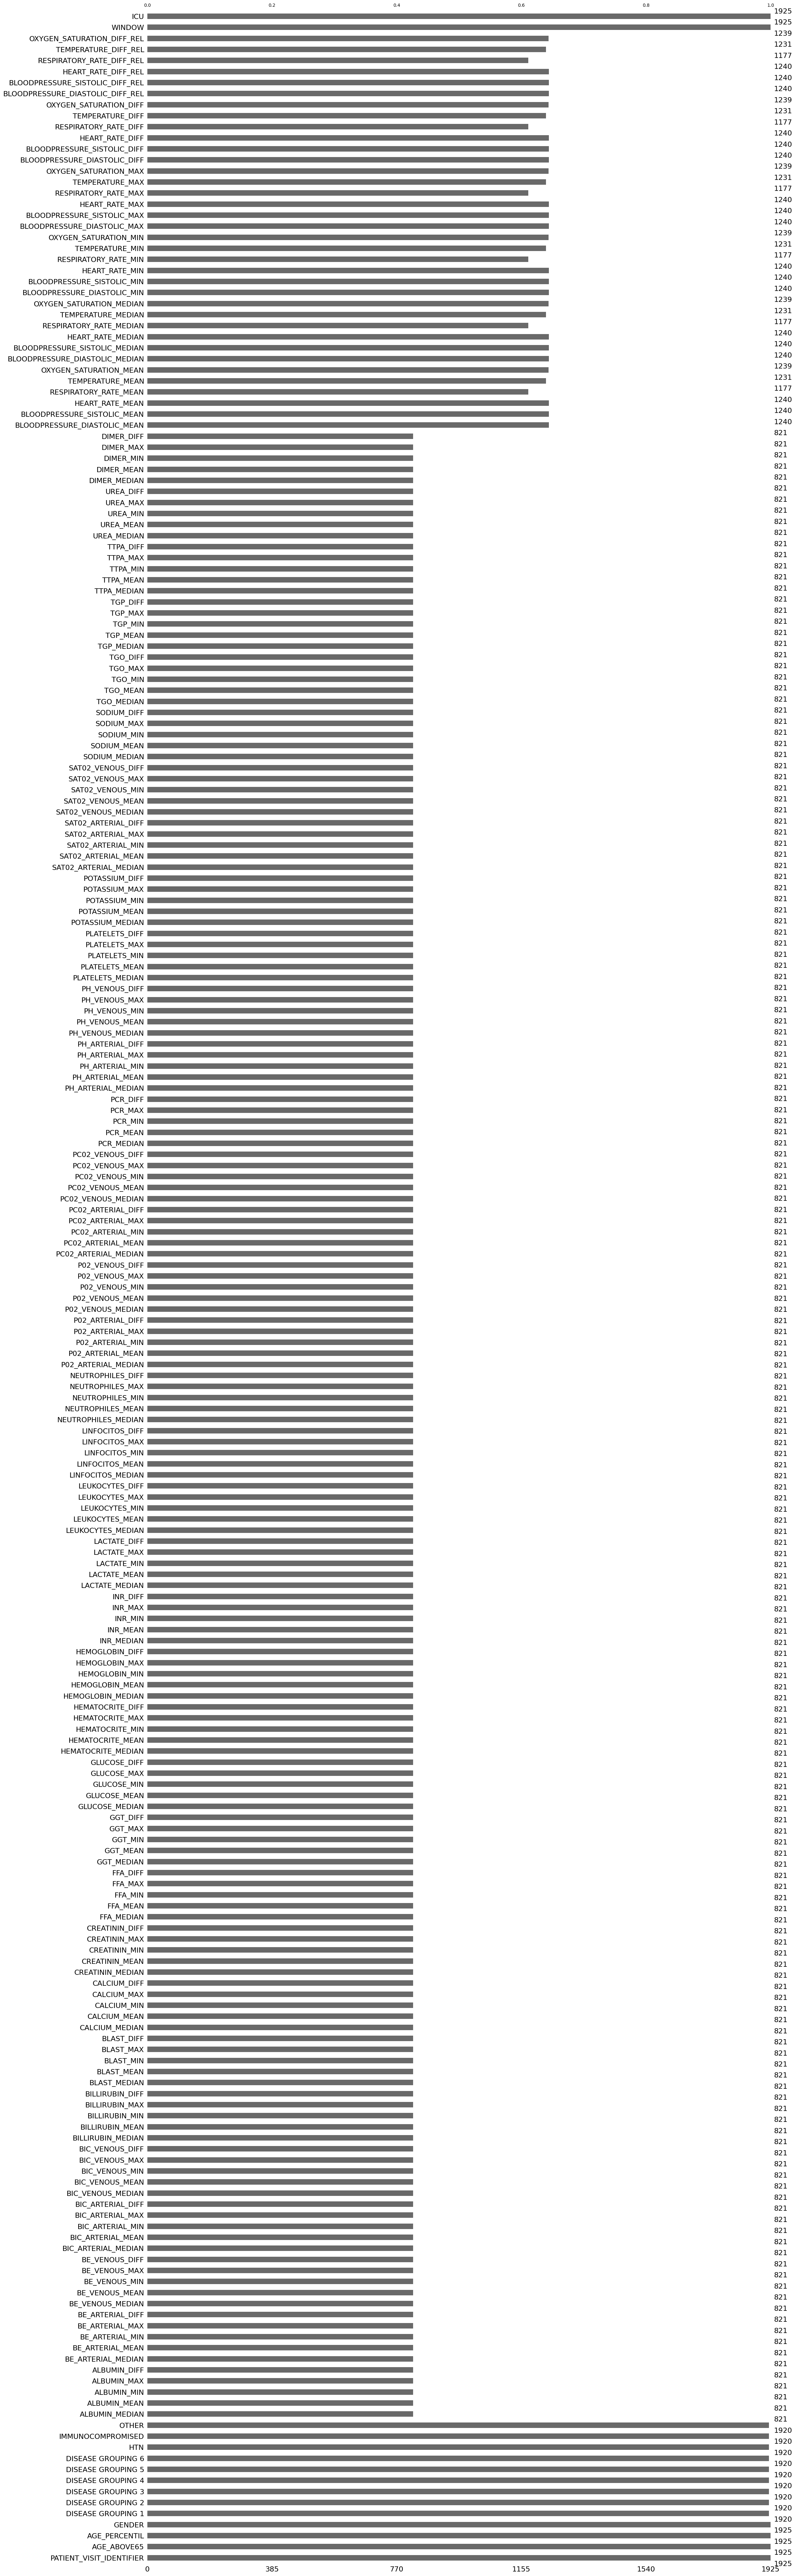

In [7]:
msno.bar(raw_data)

**Observations:**
- As it was said by the author, data has been cleaned already so missing data is asigned as **NaN**
- PATIENT_VISIT_IDENTIFIER repeats the same value in couple rows. It means that **the same patient** has been checked at different times. **The total number of patients inside this dataset is 385. (5 rows of data per person. 385 x 5 = 1925rows)**
- the data is sorted chronologicaly for every patient (window starts from **"0-2"** and ends **"Above_12"**)
- usually almost entire row is empty. That is because of the patient testing frequency by the hospital. Sometimes patient might be tested for example in the window **"0-2"** and **"6-8"** and the rest will be empty.

# Exploratory Data Analysis (EDA) <a name='eda'></a>

## Missing Data handling

In [8]:
print('NaN values =', raw_data.isnull().sum().sum())
print("""""")

vars_with_missing = []

for feature in raw_data.columns:
    missings = raw_data[feature].isna().sum()
    
    if missings > 0 :
        vars_with_missing.append(feature)
        missings_perc = missings / raw_data.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values.'.format(feature, missings, missings_perc))
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

NaN values = 223863

Variable DISEASE GROUPING 1 has 5 records (0.26%) with missing values.
Variable DISEASE GROUPING 2 has 5 records (0.26%) with missing values.
Variable DISEASE GROUPING 3 has 5 records (0.26%) with missing values.
Variable DISEASE GROUPING 4 has 5 records (0.26%) with missing values.
Variable DISEASE GROUPING 5 has 5 records (0.26%) with missing values.
Variable DISEASE GROUPING 6 has 5 records (0.26%) with missing values.
Variable HTN has 5 records (0.26%) with missing values.
Variable IMMUNOCOMPROMISED has 5 records (0.26%) with missing values.
Variable OTHER has 5 records (0.26%) with missing values.
Variable ALBUMIN_MEDIAN has 1104 records (57.35%) with missing values.
Variable ALBUMIN_MEAN has 1104 records (57.35%) with missing values.
Variable ALBUMIN_MIN has 1104 records (57.35%) with missing values.
Variable ALBUMIN_MAX has 1104 records (57.35%) with missing values.
Variable ALBUMIN_DIFF has 1104 records (57.35%) with missing values.
Variable BE_ARTERIAL_MED

**Observations:**
- Most of the features have at least 35% of missing values up to 57.35%
- The reason, why we have so many missing values is connected with, how frequently the hospital performs particular tests

### Create "GO_ICU" column which will indicate if patient eventually went to ICU

That new column is necessary due to the guidelines from the author who informed about not using the data that already indicate that "ICU" == 1

In [9]:
df_admitted = (raw_data.groupby("PATIENT_VISIT_IDENTIFIER")["ICU"].sum()>0).reset_index()*1
df_admitted.columns = ["PATIENT_VISIT_IDENTIFIER", "GO_ICU"]

In [10]:
raw_data = pd.merge(raw_data, df_admitted, on = "PATIENT_VISIT_IDENTIFIER")

### Filling up the missing data with the data of the same patient

In [11]:
# Create dataframe with the same colums as in raw_data
data = pd.DataFrame(columns=raw_data.columns)

# Create empty list which will hold data of each patient (mean)
patient_first_window = []

# for loop which goes through all patient id 
for patient_id in range(0, number_of_patients):

    # Create new dataframe which contains ONLY one patient data
    one_patient_data = raw_data.loc[raw_data['PATIENT_VISIT_IDENTIFIER'] == patient_id]
    
    # Fill up missing data with mean of available data (available data == particaular patient data)
    one_patient_data.fillna(one_patient_data.mean(),inplace=True)
    
    # using dataframe.iloc[[0]] => returns a dataframe
    patient_first_window.append(one_patient_data.iloc[[0]])
    
# Create new DataFrame with mean data of each patient cobined into one row (window 0-2)
# Add patient to the new main Dataframe which will contain all patients data
data = pd.concat(patient_first_window)


/var/folders/94/vt0_m_ds4ldfdtdt98l0j_cr0000gn/T/ipykernel_83979/2925090691.py:14: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/94/vt0_m_ds4ldfdtdt98l0j_cr0000gn/T/ipykernel_83979/2925090691.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
data.shape

(385, 232)

In [13]:
data.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                          0            1          60th       0   
5                          1            1          90th       1   
10                         2            0          10th       0   
15                         3            0          40th       1   
20                         4            0          10th       0   

    DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                  0.0                 0.0                 0.0   
5                  0.0                 0.0                 0.0   
10                 0.0                 0.0                 0.0   
15                 0.0                 0.0                 0.0   
20                 0.0                 0.0                 0.0   

    DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                  0.0                 1.0                 1.0  0.0   
5                  0.0                 0.0                 0.0  1.0   
10                 0.0                 0.0                 0.0  0.0   
15                 0.0                 0.0                 0.0  0.0   
20                 0.0                 0.0                 0.0  0.0   

    IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
0                 0.0    1.0        0.302632      0.302632     0.302632   
5                 1.0    1.0        0.333333      0.333333     0.333333   
10                0.0    1.0        0.605263      0.605263     0.605263   
15                1.0    1.0       -0.263158     -0.263158    -0.263158   
20                0.0    1.0        0.605263      0.605263     0.605263   

    ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
0      0.302632          -1.0           -0.935829         -0.935829   
5      0.333333          -1.0           -0.918004         -0.918004   
10     0.605263          -1.0           -1.000000         -1.000000   
15    -0.263158          -1.0           -1.000000         -1.000000   
20     0.605263          -1.0           -1.000000         -1.000000   

    BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  \
0         -0.935829        -0.935829              -1.0         -0.931937   
5         -0.918004        -0.918004              -1.0         -0.972077   
10        -1.000000        -1.000000              -1.0         -1.000000   
15        -1.000000        -1.000000              -1.0         -1.000000   
20        -1.000000        -1.000000              -1.0         -1.000000   

    BE_VENOUS_MEAN  BE_VENOUS_MIN  BE_VENOUS_MAX  BE_VENOUS_DIFF  \
0        -0.931937      -0.931937      -0.931937            -1.0   
5        -0.972077      -0.972077      -0.972077            -1.0   
10       -1.000000      -1.000000      -1.000000            -1.0   
15       -1.000000      -1.000000      -1.000000            -1.0   
20       -1.000000      -1.000000      -1.000000            -1.0   

    BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  BIC_ARTERIAL_MIN  \
0             -0.317073          -0.317073         -0.317073   
5             -0.268293          -0.268293         -0.268293   
10            -0.317073          -0.317073         -0.317073   
15            -0.317073          -0.317073         -0.317073   
20            -0.317073          -0.317073         -0.317073   

    BIC_ARTERIAL_MAX  BIC_ARTERIAL_DIFF  BIC_VENOUS_MEDIAN  BIC_VENOUS_MEAN  \
0          -0.317073               -1.0          -0.365854        -0.365854   
5          -0.268293               -1.0          -0.268293        -0.268293   
10         -0.317073               -1.0          -0.317073        -0.317073   
15         -0.317073               -1.0          -0.317073        -0.317073   
20         -0.317073               -1.0          -0.317073        -0.317073   

    BIC_VENOUS_MIN  BIC_VENOUS_MAX  BIC_VENOUS_DIFF  BILLIRUBIN_MEDIAN  \
0        -0.365854       -0.365854             -1.0          -0.959009   
5        -0.268293       

**Important Info:**
- From now "ICU" column shows **patient who has been sent to ICU straight away**. Based on information from author, **We cannot use data which shows ICU == 1 already, so we will drop every row where "ICU" value is equal to 1.**
- Our new indicator "GO_ICU" shows patients who went to ICU later than from the beggining ("GO_ICU" == 1) or patient who did not go at all ("GO_ICU" == 0)
- After taking mean values from patient data and filling up NaN with them, we have kept **ONE ROW ONLY** for each patient which means that amount of rows has been decreased by **5 TIMES**
- 1925 / 5 = 385 **==** Amount of patients

From now, **AMOUNT OF PATIENTS =  AMOUNT OF ROWS**

### Execute operation mentioned in "Important Info"

In [14]:
#drop rows with ICU == 1 ie drop data when the target variable is present, as stipulated by dataset author
data = data[data.ICU == 0].reset_index(drop = True)

In [15]:
data.shape

(353, 232)

After removing patients who went to ICU straight away, we have 353 patients out of 385

### Removing "ICU" and "WINDOW" as, from now, they have no value for us

In [16]:
#drop unnecessary columns
data = data.drop(["WINDOW", "ICU"],axis = 1)

### ASSUMPTION

I am assuming that mean of values which belong to the patient that eventually go to ICU, will differ from mean values which belong to patient who will not go to ICU

### Keep dtypes as they were

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Columns: 230 entries, PATIENT_VISIT_IDENTIFIER to GO_ICU
dtypes: float64(225), int64(4), object(1)
memory usage: 634.4+ KB


4 objects out of 6 should be an int64. 2 columns which are objects are: **'AGE_PERCENTIL'** and **'WINDOW'**

In [18]:
objects = data.select_dtypes(object).columns
print(objects)

Index(['AGE_PERCENTIL'], dtype='object')


In [19]:
data['PATIENT_VISIT_IDENTIFIER'] = data['PATIENT_VISIT_IDENTIFIER'].astype('int64')
data['AGE_ABOVE65'] = data['AGE_ABOVE65'].astype('int64')
data['GENDER'] = data['GENDER'].astype('int64')


In [20]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 0 to 1924
Columns: 232 entries, PATIENT_VISIT_IDENTIFIER to GO_ICU
dtypes: float64(225), int64(5), object(2)
memory usage: 3.4+ MB


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Columns: 230 entries, PATIENT_VISIT_IDENTIFIER to GO_ICU
dtypes: float64(225), int64(4), object(1)
memory usage: 634.4+ KB


In [22]:
def check_for_missing_data_in_columns(dataset_name):
    print('NaN values =', dataset_name.isnull().sum().sum())
    print("""""")

    vars_with_missing = []

    for feature in dataset_name.columns:
        missings = dataset_name[feature].isna().sum()

        if missings > 0 :
            vars_with_missing.append(feature)
            missings_perc = missings / dataset_name.shape[0]

            print('Column {} has {} records ({:.2%}) with missing values.'.format(feature, missings, missings_perc))
    print('In total, there are {} columns with missing values'.format(len(vars_with_missing)))
    
check_for_missing_data_in_columns(data)

NaN values = 405

Column DISEASE GROUPING 1 has 1 records (0.28%) with missing values.
Column DISEASE GROUPING 2 has 1 records (0.28%) with missing values.
Column DISEASE GROUPING 3 has 1 records (0.28%) with missing values.
Column DISEASE GROUPING 4 has 1 records (0.28%) with missing values.
Column DISEASE GROUPING 5 has 1 records (0.28%) with missing values.
Column DISEASE GROUPING 6 has 1 records (0.28%) with missing values.
Column HTN has 1 records (0.28%) with missing values.
Column IMMUNOCOMPROMISED has 1 records (0.28%) with missing values.
Column OTHER has 1 records (0.28%) with missing values.
Column ALBUMIN_MEDIAN has 2 records (0.57%) with missing values.
Column ALBUMIN_MEAN has 2 records (0.57%) with missing values.
Column ALBUMIN_MIN has 2 records (0.57%) with missing values.
Column ALBUMIN_MAX has 2 records (0.57%) with missing values.
Column ALBUMIN_DIFF has 2 records (0.57%) with missing values.
Column BE_ARTERIAL_MEDIAN has 2 records (0.57%) with missing values.
Column

**Observation:**
- after data fill up, we can see that new filled up dataset still has 1 or 2 missing values in each column.

In [23]:
empty_data = data[data.isna().any(axis=1)]
display(empty_data)

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
183                       199            0          10th       0   
262                       287            0          10th       0   

     DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
183                 NaN                 NaN                 NaN   
262                 0.0                 0.0                 0.0   

     DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
183                 NaN                 NaN                 NaN  NaN   
262                 0.0                 0.0                 0.0  0.0   

     IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
183                NaN    NaN             NaN           NaN          NaN   
262                0.0    1.0             NaN           NaN          NaN   

     ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
183          NaN           NaN                 NaN               NaN   
262          NaN           NaN                 NaN               NaN   

     BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  \
183              NaN              NaN               NaN               NaN   
262              NaN              NaN               NaN               NaN   

     BE_VENOUS_MEAN  BE_VENOUS_MIN  BE_VENOUS_MAX  BE_VENOUS_DIFF  \
183             NaN            NaN            NaN             NaN   
262             NaN            NaN            NaN             NaN   

     BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  BIC_ARTERIAL_MIN  \
183                  NaN                NaN               NaN   
262                  NaN                NaN               NaN   

     BIC_ARTERIAL_MAX  BIC_ARTERIAL_DIFF  BIC_VENOUS_MEDIAN  BIC_VENOUS_MEAN  \
183               NaN                NaN                NaN              NaN   
262               NaN                NaN                NaN              NaN   

     BIC_VENOUS_MIN  BIC_VENOUS_MAX  BIC_VENOUS_DIFF  BILLIRUBIN_MEDIAN  \
183             NaN             NaN              NaN                NaN   
262             NaN             NaN              NaN                NaN   

     BILLIRUBIN_MEAN  BILLIRUBIN_MIN  BILLIRUBIN_MAX  BILLIRUBIN_DIFF  \
183              NaN             NaN             NaN              NaN   
262              NaN             NaN             NaN              NaN   

     BLAST_MEDIAN  BLAST_MEAN  BLAST_MIN  BLAST_MAX  BLAST_DIFF  \
183           NaN         NaN        NaN        NaN         NaN   
262           NaN         NaN        NaN        NaN         NaN   

     CALCIUM_MEDIAN  CALCIUM_MEAN  CALCIUM_MIN  CALCIUM_MAX  CALCIUM_DIFF  \
183             NaN           NaN          NaN          NaN           NaN   
262             NaN           NaN          NaN          NaN           NaN   

     CREATININ_MEDIAN  CREATININ_MEAN  CREATININ_MIN  CREATININ_MAX  \
183               NaN             NaN            NaN            NaN   
262               NaN             NaN            NaN            NaN   

     CREATININ_DIFF  FFA_MEDIAN  FFA_MEAN  FFA_MIN  FFA_MAX  FFA_DIFF  \
183             NaN         NaN       NaN      NaN      NaN       NaN   
262             NaN         NaN       NaN      NaN      NaN       NaN   

     GGT_MEDIAN  GGT_MEAN  GGT_MIN  GGT_MAX  GGT_DIFF  GLUCOSE_MEDIAN  \
183         NaN       NaN      NaN      NaN       NaN             NaN   
262         NaN       NaN      NaN      NaN       NaN             NaN   

     GLUCOSE_MEAN  GLUCOSE_MIN  GLUCOSE_MAX  GLUCOSE_DIFF  HEMATOCRITE_MEDIAN  \
183           NaN          NaN          NaN           NaN                 NaN   
262           NaN          NaN          NaN           NaN                 NaN   

     HEMATOCRITE_MEAN  HEMATOCRITE_MIN  HEMATOCRITE_MAX  HEMATOCRITE_DIFF  \
183               NaN              NaN              NaN               NaN   
262               NaN              NaN              NaN               NaN   

     HEMOGLOBIN_MEDIAN  HEMOGLOBIN_MEAN  HEMOGLO

**Observation:**<br>
There are two patients (**199** and **287**) who have not been filled up because some coulmns do not have any data in rows which belongs to that particular patient. The previous function needed at least one value in the column for each patient to fill the gaps. Because we are working on individual data of each person **we will drop the data of these two patients**.

In [24]:
# drop rows where at least one value is NaN
dataset = data.dropna(axis=0)
dataset = dataset.reset_index(drop=True)

In [25]:
check_for_missing_data_in_columns(dataset)

NaN values = 0

In total, there are 0 columns with missing values


In [26]:
dataset.shape

(351, 230)

After removing those two patients, data is now free from any missing values. The final shape of the dataset is:
- 351 rows (1925 rows before)
- 230 columns (232 before, with "GO_ICU")

## DATA DUPLICATIONS IN COLUMNS

In [27]:
# check for duplicate columns i.e columns having all values exactly equal
duplicated = dataset.T.duplicated()
count = 0

# The first instance of a column is marked as 'False', when the value is seen to be repeated in other 
# column(s) it is marked as 'True'
for i in range(len(duplicated)):
    if duplicated[i] == True:
        print(duplicated.index[i], ":", duplicated[i])
        count += 1
        
# 143 duplicate columns
print("total duplicate columns = ", count)

ALBUMIN_MEAN : True
ALBUMIN_MIN : True
ALBUMIN_MAX : True
BE_ARTERIAL_MEAN : True
BE_ARTERIAL_MIN : True
BE_ARTERIAL_MAX : True
BE_ARTERIAL_DIFF : True
BE_VENOUS_MEAN : True
BE_VENOUS_MIN : True
BE_VENOUS_MAX : True
BE_VENOUS_DIFF : True
BIC_ARTERIAL_MEAN : True
BIC_ARTERIAL_MIN : True
BIC_ARTERIAL_MAX : True
BIC_ARTERIAL_DIFF : True
BIC_VENOUS_MEAN : True
BIC_VENOUS_MIN : True
BIC_VENOUS_MAX : True
BIC_VENOUS_DIFF : True
BILLIRUBIN_MEAN : True
BILLIRUBIN_MIN : True
BILLIRUBIN_MAX : True
BILLIRUBIN_DIFF : True
BLAST_MEAN : True
BLAST_MIN : True
BLAST_MAX : True
BLAST_DIFF : True
CALCIUM_MEAN : True
CALCIUM_MIN : True
CALCIUM_MAX : True
CALCIUM_DIFF : True
CREATININ_MEAN : True
CREATININ_MIN : True
CREATININ_MAX : True
CREATININ_DIFF : True
FFA_MEAN : True
FFA_MIN : True
FFA_MAX : True
FFA_DIFF : True
GGT_MEAN : True
GGT_MIN : True
GGT_MAX : True
GGT_DIFF : True
GLUCOSE_MEAN : True
GLUCOSE_MIN : True
GLUCOSE_MAX : True
GLUCOSE_DIFF : True
HEMATOCRITE_MEAN : True
HEMATOCRITE_MIN : True
H

In [28]:
dataset = dataset.T.drop_duplicates().T

In [29]:
# Drop columns with constant value
col = dataset.columns[dataset.nunique() <= 1].tolist()

print(col)

dataset.drop(columns = col, inplace=True)

['ALBUMIN_DIFF']


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 86 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   PATIENT_VISIT_IDENTIFIER          351 non-null    object
 1   AGE_ABOVE65                       351 non-null    object
 2   AGE_PERCENTIL                     351 non-null    object
 3   GENDER                            351 non-null    object
 4   DISEASE GROUPING 1                351 non-null    object
 5   DISEASE GROUPING 2                351 non-null    object
 6   DISEASE GROUPING 3                351 non-null    object
 7   DISEASE GROUPING 4                351 non-null    object
 8   DISEASE GROUPING 5                351 non-null    object
 9   DISEASE GROUPING 6                351 non-null    object
 10  HTN                               351 non-null    object
 11  IMMUNOCOMPROMISED                 351 non-null    object
 12  OTHER                 

In [31]:
dataset.shape

(351, 86)

Observation:
- 143 columns has the same values accross all rows. It adds **NO VALUE** to the future modeling so it has been dropped.
- 86 columns left. (230 - 143 - 1 = 86)

### Keep dtypes as they were

In [32]:
for column in dataset.columns:
    try:
        dataset[column] = dataset[column].astype("float64")
    except ValueError:
        pass


dataset['AGE_ABOVE65'] = dataset['AGE_ABOVE65'].astype('int64')
dataset['GENDER'] = dataset['GENDER'].astype('int64')
dataset['PATIENT_VISIT_IDENTIFIER'] = dataset['PATIENT_VISIT_IDENTIFIER'].astype('int64')
dataset['GO_ICU'] = dataset['GO_ICU'].astype('int64')

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 86 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PATIENT_VISIT_IDENTIFIER          351 non-null    int64  
 1   AGE_ABOVE65                       351 non-null    int64  
 2   AGE_PERCENTIL                     351 non-null    object 
 3   GENDER                            351 non-null    int64  
 4   DISEASE GROUPING 1                351 non-null    float64
 5   DISEASE GROUPING 2                351 non-null    float64
 6   DISEASE GROUPING 3                351 non-null    float64
 7   DISEASE GROUPING 4                351 non-null    float64
 8   DISEASE GROUPING 5                351 non-null    float64
 9   DISEASE GROUPING 6                351 non-null    float64
 10  HTN                               351 non-null    float64
 11  IMMUNOCOMPROMISED                 351 non-null    float64
 12  OTHER   

## Convert "AGE_PERCENTIL" data into int64

In [34]:
for num in range (1, 10):
    dataset["AGE_PERCENTIL"] = dataset["AGE_PERCENTIL"].replace([f'{num}0th'], f'{num}0')
dataset["AGE_PERCENTIL"] = dataset["AGE_PERCENTIL"].replace(['Above 90th'], '100')

**IMPORTANT: In order to differentiate values "90th" and "above 90th", that second value will be represented as "100"**

In [35]:
dataset["AGE_PERCENTIL"] = dataset["AGE_PERCENTIL"].astype(int)
dataset["AGE_PERCENTIL"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 351 entries, 0 to 350
Series name: AGE_PERCENTIL
Non-Null Count  Dtype
--------------  -----
351 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


## METADATA

In [36]:
metadata = []
for feature in dataset.columns:
    # Defining the role
    if feature == 'GO_ICU':
        use = 'target'
    elif feature == 'PATIENT_VISIT_IDENTIFIER':
        use = 'patient id'
    else:
        use = 'input'
         
    # Defining the type
    if 'GROUPING' in feature or 'GENDER' in feature or 'AGE_ABOVE65' in feature or feature == 'GO_ICU':
        type = 'binary'
    elif 'AGE_PERCENTIL' in feature or feature == 'PATIENT_VISIT_IDENTIFIER':
        type = 'categorical'
    elif dataset[feature].dtype == float or isinstance(dataset[feature].dtype, float):
        type = 'real'
    else:
        type = 'integer'
        
    
    
    # Defining the data type 
    dtype = dataset[feature].dtype
    
    category = 'none'
    # Defining the category
    if 'DIFF' in feature:
        category = 'vital_signs'
    elif 'MAX' in feature:
        category = 'vital_signs'
    elif 'MIN' in feature:
        category = 'vital_signs'
    elif 'MEDIAN' in feature:
        category = 'vital_signs'
    elif 'MEAN' in feature:
        category = 'vital_signs'
    elif 'GROUPING' in feature:
        category = 'disease_group'
    
    
    # Creating a Dict that contains all the metadata for the variable
    feature_dictionary = {
        'varname': feature,
        'use': use,
        'type': type,
        'dtype': dtype,
        'category' : category
    }
    metadata.append(feature_dictionary)
    
meta = pd.DataFrame(metadata, columns=['varname', 'use', 'type', 'dtype', 'category'])
meta.set_index('varname', inplace=True)
meta

use         type    dtype  \
varname                                                              
PATIENT_VISIT_IDENTIFIER          patient id  categorical    int64   
AGE_ABOVE65                            input       binary    int64   
AGE_PERCENTIL                          input  categorical    int64   
GENDER                                 input       binary    int64   
DISEASE GROUPING 1                     input       binary  float64   
DISEASE GROUPING 2                     input       binary  float64   
DISEASE GROUPING 3                     input       binary  float64   
DISEASE GROUPING 4                     input       binary  float64   
DISEASE GROUPING 5                     input       binary  float64   
DISEASE GROUPING 6                     input       binary  float64   
HTN                                    input         real  float64   
IMMUNOCOMPROMISED                      input         real  float64   
OTHER                                  input         real  float64   
ALBUMIN_MEDIAN                         input         real  float64   
BE_ARTERIAL_MEDIAN                     input         real  float64   
BE_VENOUS_MEDIAN                       input         real  float64   
BIC_ARTERIAL_MEDIAN                    input         real  float64   
BIC_VENOUS_MEDIAN                      input         real  float64   
BILLIRUBIN_MEDIAN                      input         real  float64   
BLAST_MEDIAN                           input         real  float64   
CALCIUM_MEDIAN                         input         real  float64   
CREATININ_MEDIAN                       input         real  float64   
FFA_MEDIAN                             input         real  float64   
GGT_MEDIAN                             input         real  float64   
GLUCOSE_MEDIAN                         input         real  float64   
HEMATOCRITE_MEDIAN                     input         real  float64   
HEMOGLOBIN_MEDIAN                      input         real  float64   
INR_MEDIAN                             input         real  float64   
LACTATE_MEDIAN                         input         real  float64   
LEUKOCYTES_MEDIAN                      input         real  float64   
LINFOCITOS_MEDIAN                      input         real  float64   
NEUTROPHILES_MEDIAN                    input         real  float64   
P02_ARTERIAL_MEDIAN                    input         real  float64   
P02_VENOUS_MEDIAN                      input         real  float64   
PC02_ARTERIAL_MEDIAN                   input         real  float64   
PC02_VENOUS_MEDIAN                     input         real  float64   
PCR_MEDIAN                             input         real  float64   
PH_ARTERIAL_MEDIAN                     input         real  float64   
PH_VENOUS_MEDIAN                       input         real  float64   
PLATELETS_MEDIAN                       input         real  float64   
POTASSIUM_MEDIAN                       input         real  float64   
SAT02_ARTERIAL_MEDIAN                  input         real  float64   
SAT02_VENOUS_MEDIAN                    input         real  float64   
SODIUM_MEDIAN                          input         real  float64   
TGO_MEDIAN                             input         real  float64   
TGP_MEDIAN                             input         real  float64   
TTPA_MEDIAN                            input         real  float64   
UREA_MEDIAN                            input         real  float64   
DIMER_MEDIAN                           input         real  float64   
BLOODPRESSURE_DIASTOLIC_MEAN           input         real  float64   
BLOODPRESSURE_SISTOLIC_MEAN            input         real  float64   
HEART_RATE_MEAN                        input         real  float64   
RESPIRATORY_RATE_MEAN                  input         real  float64   
TEMPERATURE_MEAN                       input         real  float64   
OXYGEN_SATURATION_MEAN                 input         real  float64   
BLOODPRESSURE_DIASTOLIC_MEDIAN         input       

## DATA VISUALIZATION

### final dataset columns

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 86 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PATIENT_VISIT_IDENTIFIER          351 non-null    int64  
 1   AGE_ABOVE65                       351 non-null    int64  
 2   AGE_PERCENTIL                     351 non-null    int64  
 3   GENDER                            351 non-null    int64  
 4   DISEASE GROUPING 1                351 non-null    float64
 5   DISEASE GROUPING 2                351 non-null    float64
 6   DISEASE GROUPING 3                351 non-null    float64
 7   DISEASE GROUPING 4                351 non-null    float64
 8   DISEASE GROUPING 5                351 non-null    float64
 9   DISEASE GROUPING 6                351 non-null    float64
 10  HTN                               351 non-null    float64
 11  IMMUNOCOMPROMISED                 351 non-null    float64
 12  OTHER   

### Proportion of patients admited and not admited to ICU

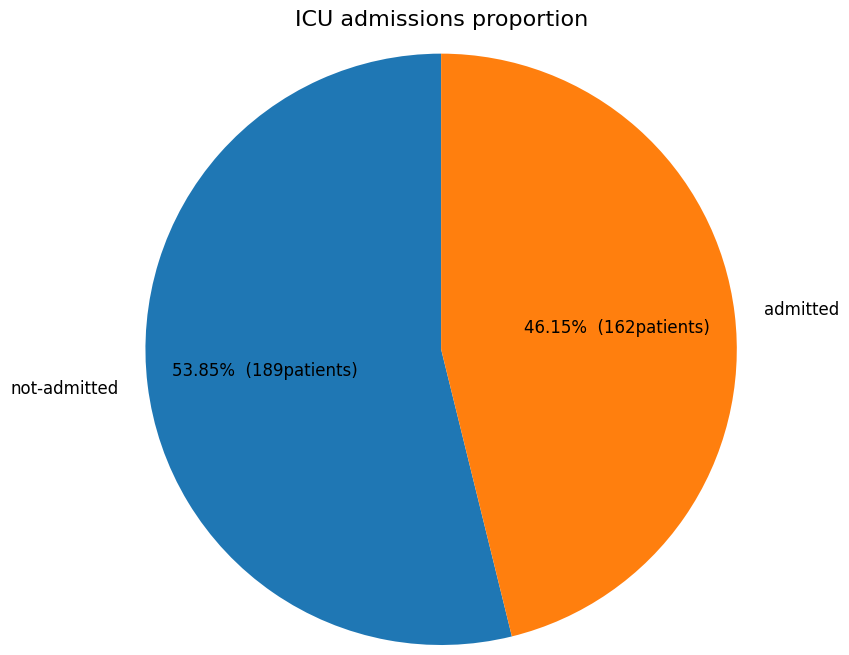

In [38]:
ICU_prop_main = dataset.groupby('GO_ICU')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()

labels = ["not-admitted", "admitted"]
plt.title('ICU admissions proportion', fontdict= {'fontsize' : 16}, pad=100)
plt.pie(ICU_prop_main['PATIENT_VISIT_IDENTIFIER'],textprops={'fontsize': 12},radius =2, labels = labels, startangle=90, autopct=lambda p : '{:.2f}%  ({:,.0f}patients)'.format(p,p * sum(ICU_prop_main['PATIENT_VISIT_IDENTIFIER'])/100))
plt.show()

### Age distribution

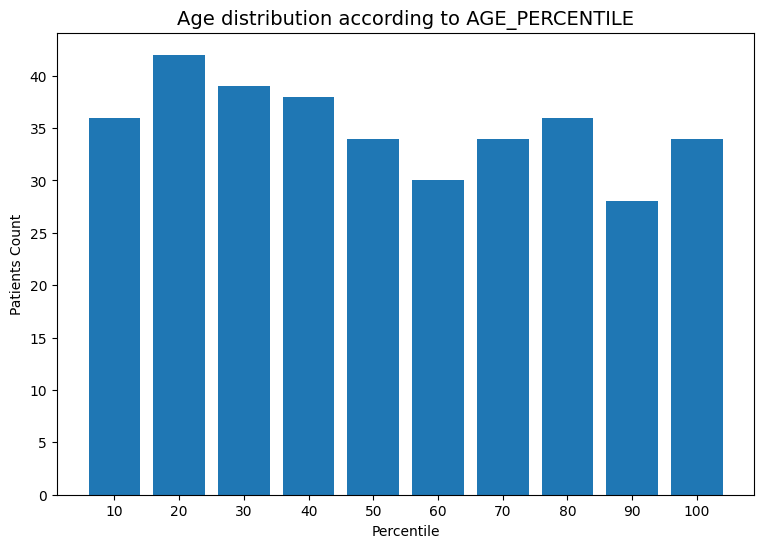

In [39]:
#Age distribution according to AGE_PERCENTILE

AGE_prop_percentil = dataset.groupby('AGE_PERCENTIL')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()
AGE_prop_percentil.head()
plt.figure(figsize=(9,6))
plt.bar(AGE_prop_percentil["AGE_PERCENTIL"],AGE_prop_percentil["PATIENT_VISIT_IDENTIFIER"], width = 8)
plt.xticks(AGE_prop_percentil["AGE_PERCENTIL"])
plt.ylabel("Patients Count")
plt.xlabel("Percentile")
plt.title('Age distribution according to AGE_PERCENTILE', fontdict= {'fontsize' : 14})
plt.show()

### ICU admitions proportion between patients below/above 65

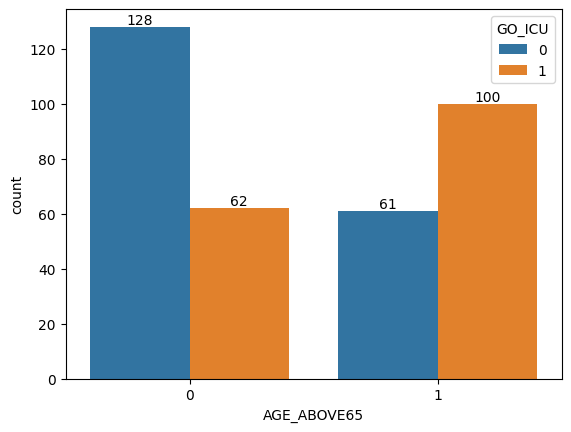

In [40]:
def create_bar_to_icu(feature_name):
    ax = sns.countplot(x=feature_name, hue="GO_ICU", data=dataset)
    for i in ax.containers:
        ax.bar_label(i,)
        
create_bar_to_icu("AGE_ABOVE65")

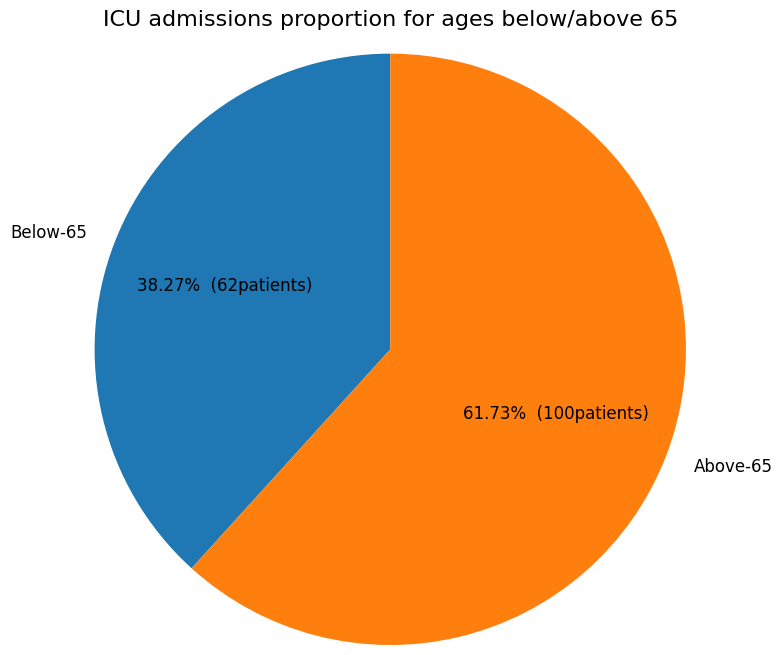

In [41]:
AGE_65_ICU = dataset[dataset['GO_ICU'] == 1]
AGE_65_ICU = AGE_65_ICU.groupby('AGE_ABOVE65')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()

labels = ["Below-65", "Above-65"]
plt.title('ICU admissions proportion for ages below/above 65', fontdict= {'fontsize' : 16}, pad=100)
plt.pie(AGE_65_ICU['PATIENT_VISIT_IDENTIFIER'],textprops={'fontsize': 12},radius =2, labels = labels, startangle=90, autopct=lambda p : '{:.2f}%  ({:,.0f}patients)'.format(p,p * sum(AGE_65_ICU['PATIENT_VISIT_IDENTIFIER'])/100))
plt.show()

### ICU admissions proportion according to AGE_PERCENTILE

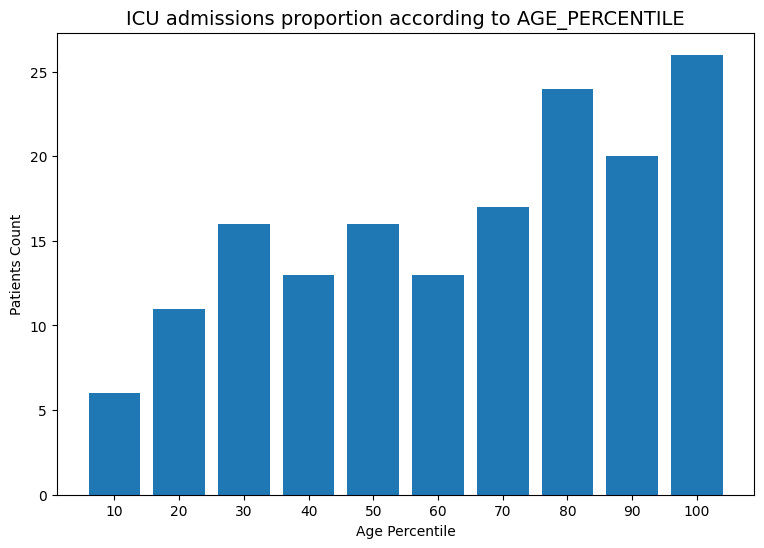

In [42]:
AGE_prop_percentil = dataset[dataset['GO_ICU'] == 1]
AGE_prop_percentil = AGE_prop_percentil.groupby('AGE_PERCENTIL')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()
AGE_prop_percentil.head()
plt.figure(figsize=(9,6))
plt.bar(AGE_prop_percentil["AGE_PERCENTIL"],AGE_prop_percentil["PATIENT_VISIT_IDENTIFIER"], width = 8)
plt.xticks(AGE_prop_percentil["AGE_PERCENTIL"])
plt.ylabel("Patients Count")
plt.xlabel("Age Percentile")
plt.title('ICU admissions proportion according to AGE_PERCENTILE', fontdict= {'fontsize' : 14})
plt.show()

**Observations:**
- ICU admissions proportion shows almost perfect distribution in data between patients who eventually went to ICU and those who did not.
- Age distribution is almost evenly distributed across all age percentiles. 
- In ICU admissions proportion between patients below/above 65 we can see that **most of the patients which went to ICU are people over 65.** This is related to the nature of COVID-19, which has proven to be more aggressive towards the elderly people. **This might be one of the most crucial features since it represents a real problem that has been confirmed by doctors and and clearly shows influence on target**
- As I have mentioned above, because of COVID-19 nature, we can see an upwards trend in ICU admissions depending on the age of patients (if older patient, there is higher probability of ICU admission)

### Create heatmap of two feature which are related to the age of a patient

In [43]:
def corr_heatmap(sample, masking=False):
    sns.set_style('whitegrid')
    # Create color map ranging between two colors
    cmap = sns.diverging_palette(50, 10, as_cmap=True)
    fig, ax = plt.subplots(figsize=(10,10))
    
    if masking==False:
        correlations = sample.corr()
        sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f', 
                    square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    else:
        correlations = np.triu(sample.corr())
        sns.heatmap(sample.corr(), cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75}, 
                    mask=correlations)
    plt.show();    

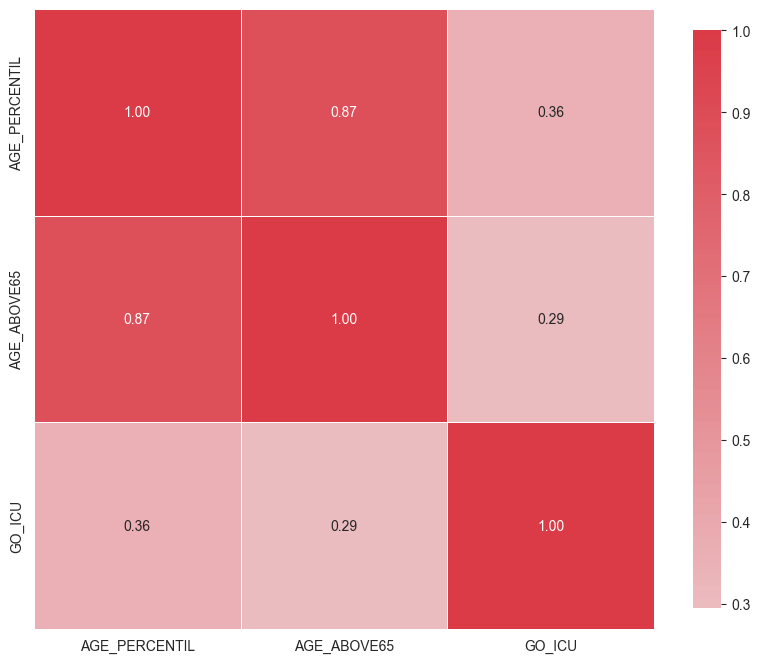

In [44]:
sample = dataset
var = ['AGE_PERCENTIL', 'AGE_ABOVE65', 'GO_ICU']
sample = sample[var]
corr_heatmap(sample)

Observation:
- we have 2 features which are related to the age of pateint
- There is quite big correlation between them, so we will have to choose which one is less important<br>


**"AGE_PERCENTIL" is going to be used for future modeling since it has higher correlation (0.36) with the target, than "AGE_ABOVE65" (0.29)**

In [45]:
dataset.drop(columns = 'AGE_ABOVE65', inplace=True)

### ICU admissions based on gender 

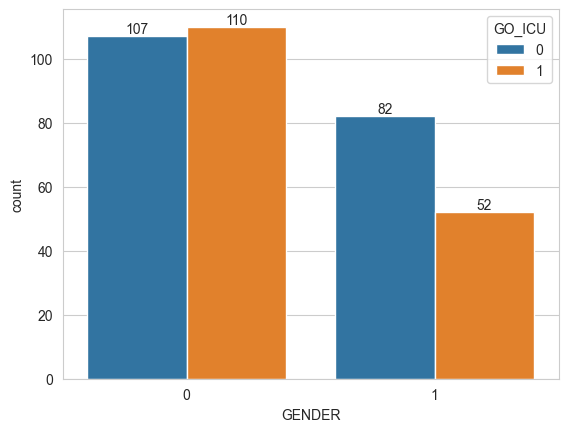

In [46]:
create_bar_to_icu("GENDER")

Observation:
- In terms of ICU admissions based on gender, we can see that **gender "0" has higher amount of ICU admissions than gender "1"**. 
- We have to concider disproportion between gender "1" and gender "0", so for this example, **I don't see this feature to be high quality for future modeling**

### ICU admissions based on Hypertension

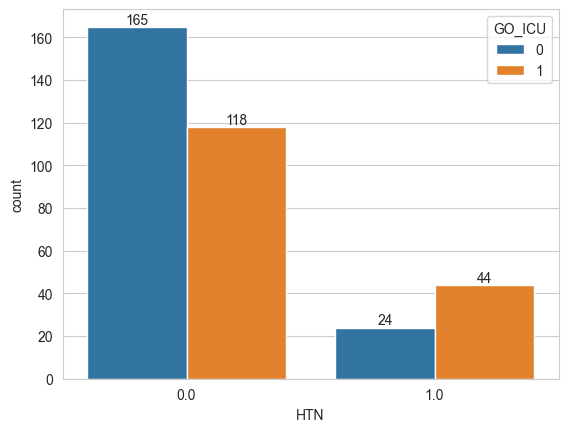

In [47]:
create_bar_to_icu("HTN")

### ICU admissions based on feature "Immunocompromised"

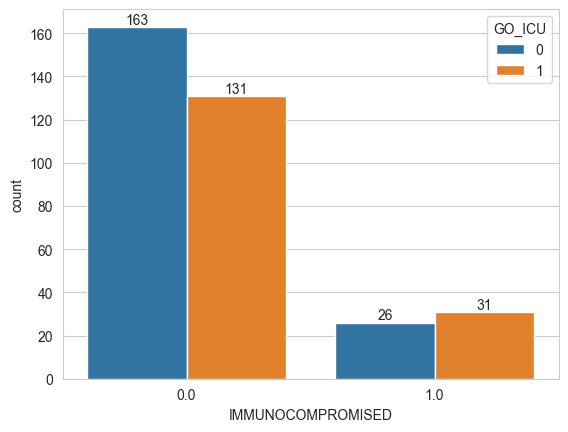

In [48]:
create_bar_to_icu("IMMUNOCOMPROMISED")

### ICU admissions based on other

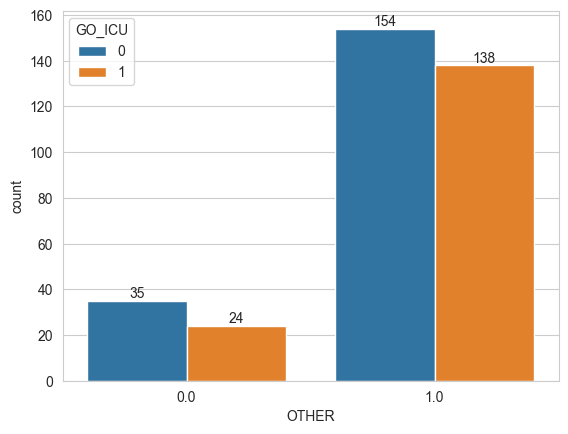

In [49]:
create_bar_to_icu("OTHER")

Observations:
- HTN (Hypertension) - high possibility of ICU admission when HTN = 1, but due to not many patient with HTN, it is not going to help with modeling (283 vs 68)
- IMMUNOCOMPROMISED - the same situation with feature "immunocompromised" as in HTN (294 vs 57)
- OTHER - Another feature where value distribution is highly imbalanced <br><br>
All 3 features are not going to be helpful with modeling **due to high data imbalance**

In [50]:
col = ["OTHER", "IMMUNOCOMPROMISED", "HTN"]
dataset.drop(columns = col, inplace=True)

### Disease gropuping 

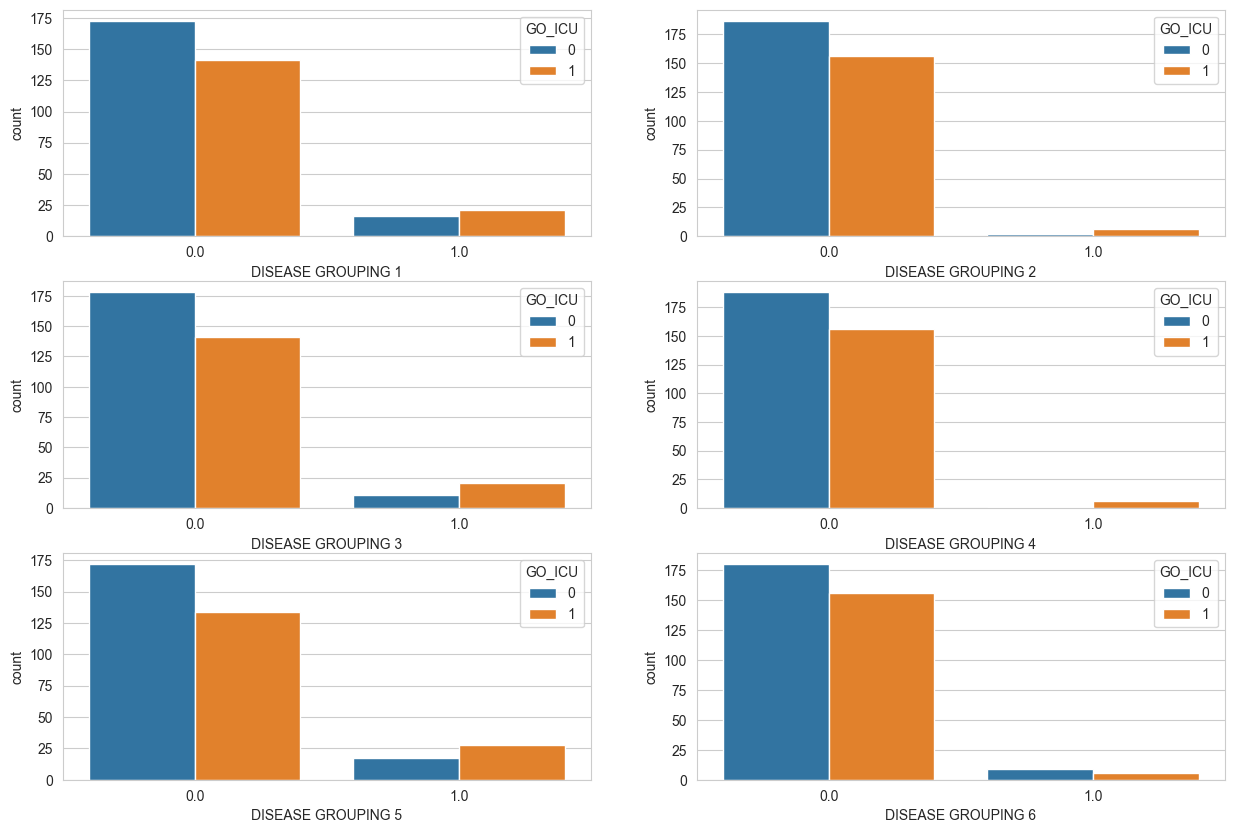

In [51]:
disease_groups = meta[meta.category == 'disease_group'].index
fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(15,10))
col = 0
for i in range(len(disease_groups)):
    x = sns.countplot(x=disease_groups[i], hue="GO_ICU", data=dataset, ax = axes[int((i)/2)][col])
    col = (col+1) % 2

Observations:
- We might assume that **disease gropuing 0-5 used to be a categorical feature broken down into 5 separate columns**.
- even when combining all disease grouping together we can see quite **big imbalance between values**.
- when looking at each disease group, **when value is true, it still does not clearly show that patient eventually wnet to ICU or not**.
- **The entire disease group (from 1 to 5) is going to be droped**

In [52]:
dataset.drop(columns = disease_groups, inplace=True)

### Create dataframe which contains vital signs data only

In [53]:
vital_signs = meta[meta.category == 'vital_signs'].index
vital_signs_ICU = vital_signs.append(meta[meta.use == 'target'].index)
vital_signs_df = dataset[vital_signs_ICU]

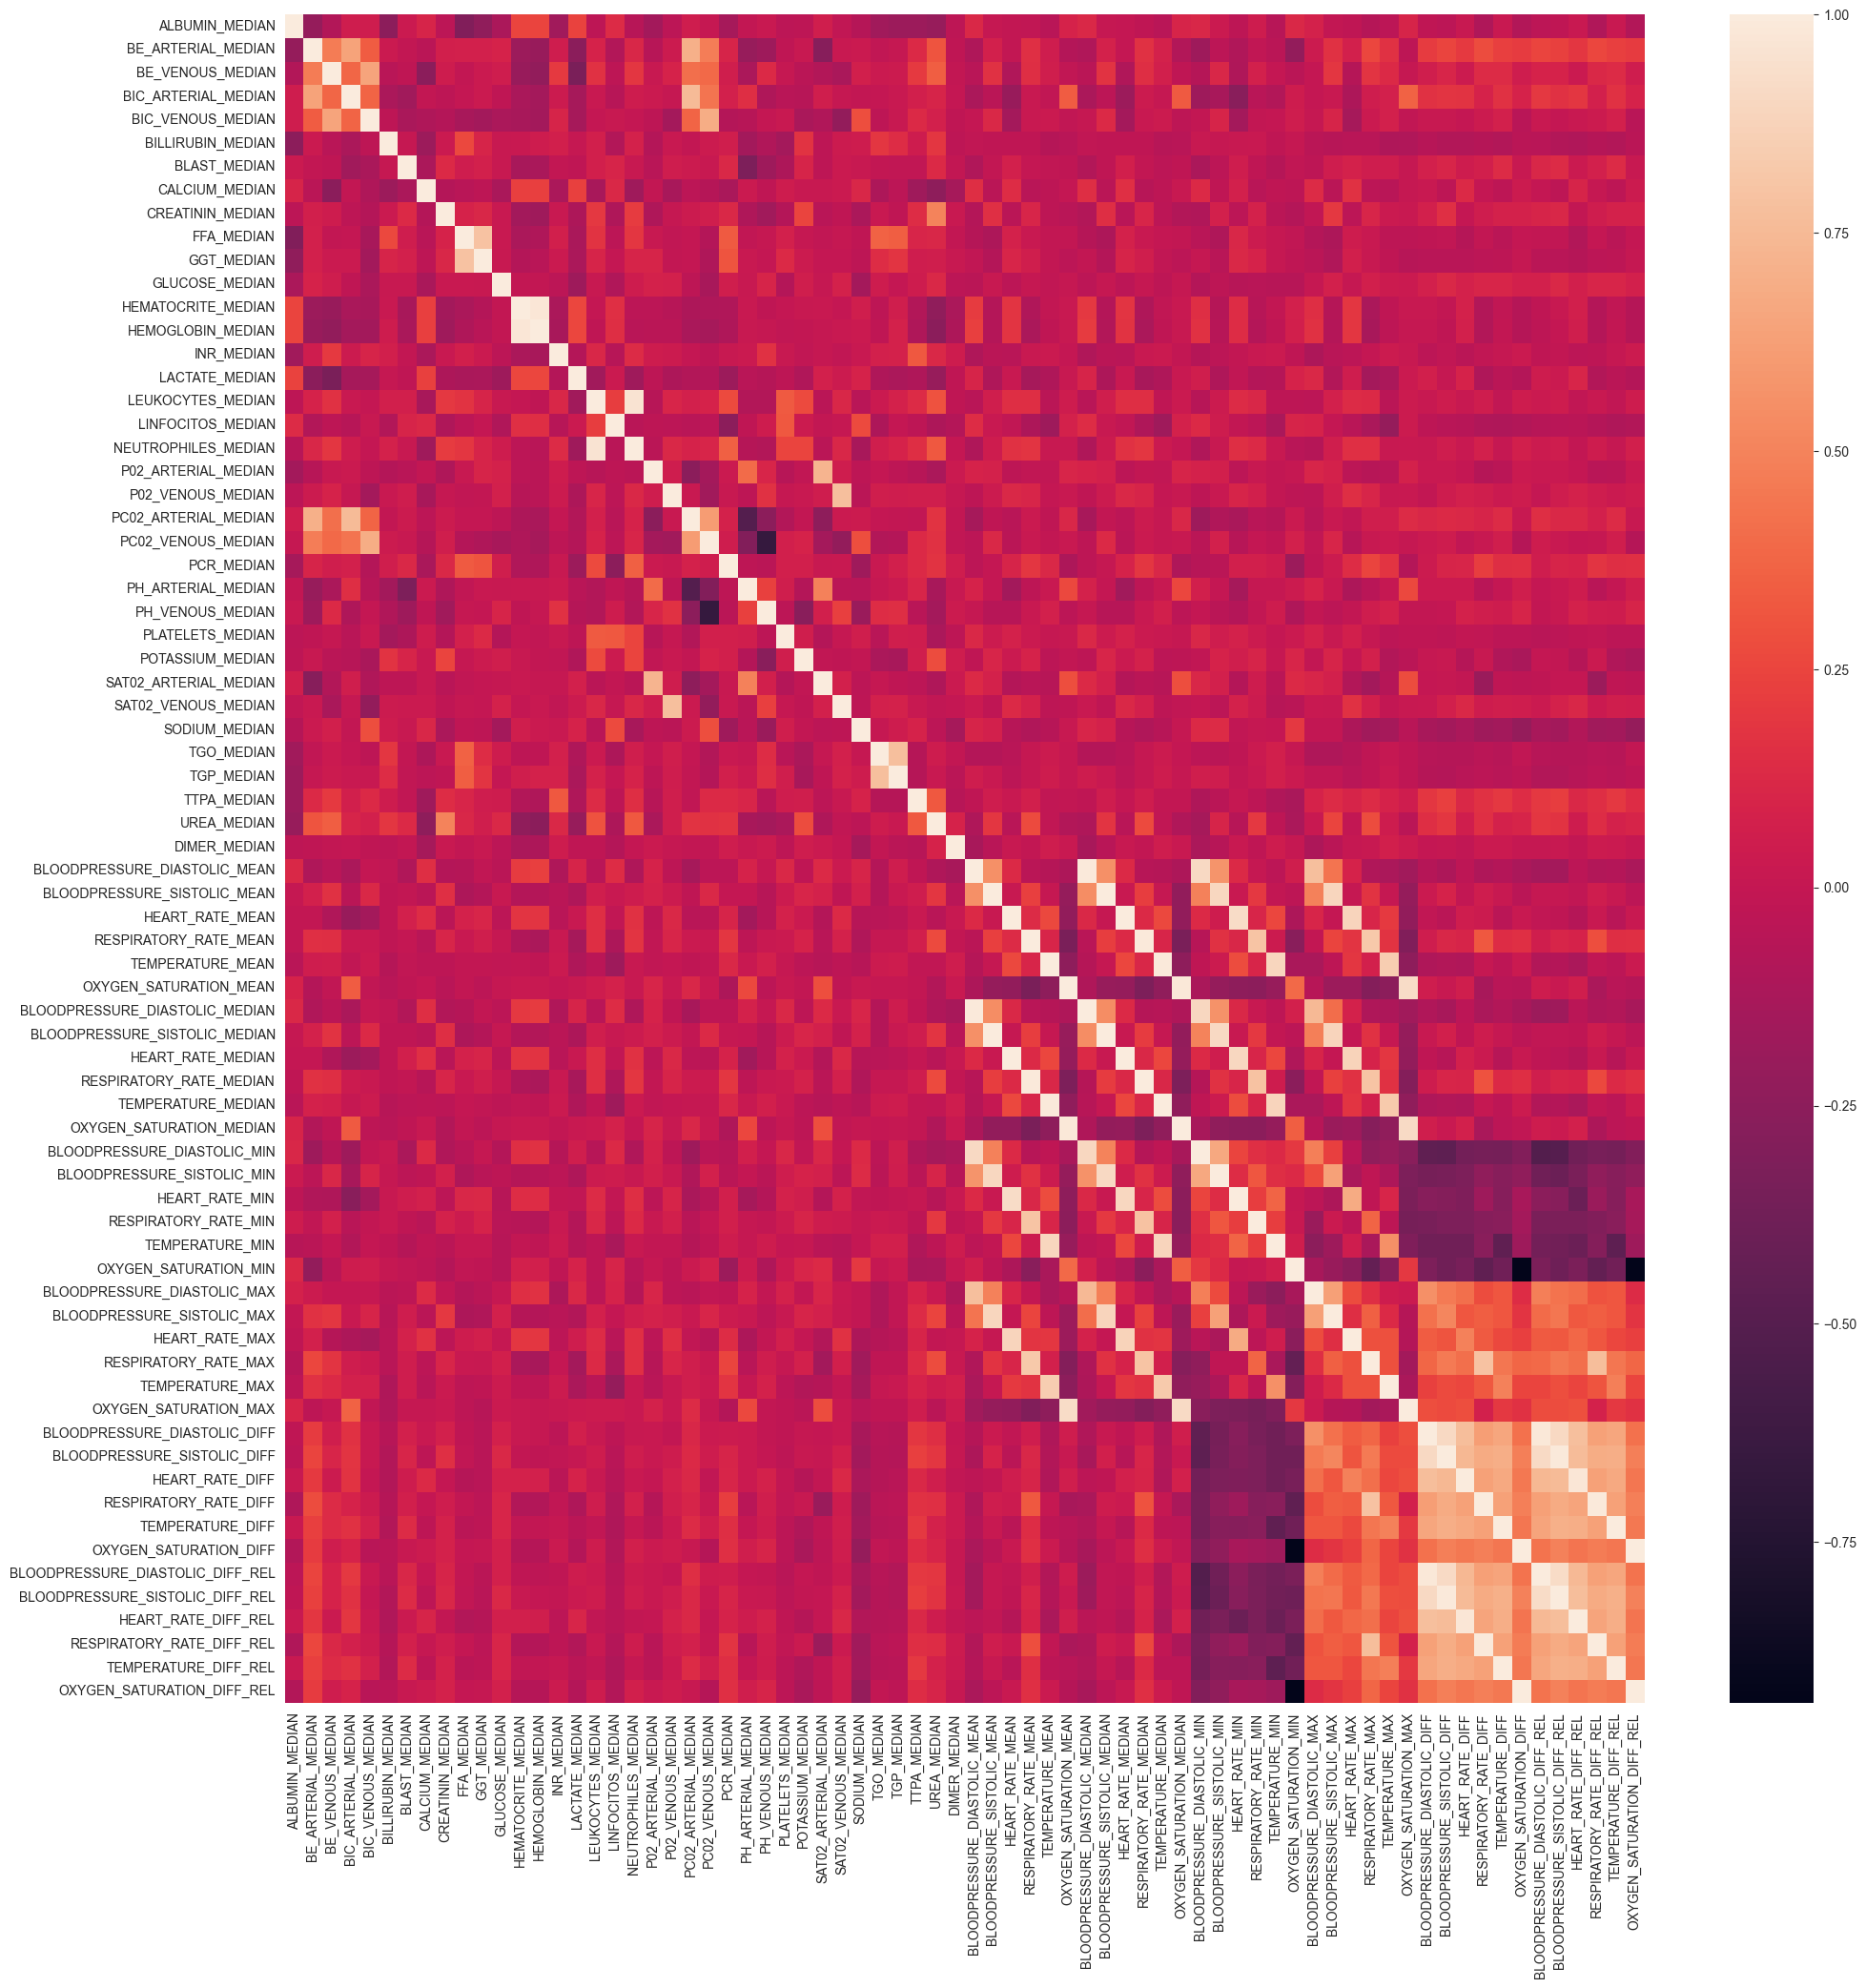

In [54]:
f,ax = plt.subplots(figsize=(23,23))
sns.heatmap(vital_signs_df.drop(columns=['GO_ICU']).corr())
plt.show()

### Applying standard deviation onto data to visualize difference between values and targets

In [55]:
rows_list = []
for f in vital_signs:
    v1 = vital_signs_df[ vital_signs_df['GO_ICU']==1 ][f].var()
    v0 = vital_signs_df[ vital_signs_df['GO_ICU']==0 ][f].var()
    dict1 = {
        'feature' : f,
        'icu' : v1,
        'non-icu' : v0
    }
    rows_list.append(dict1)
    
var_vital_signs = pd.DataFrame(rows_list) 

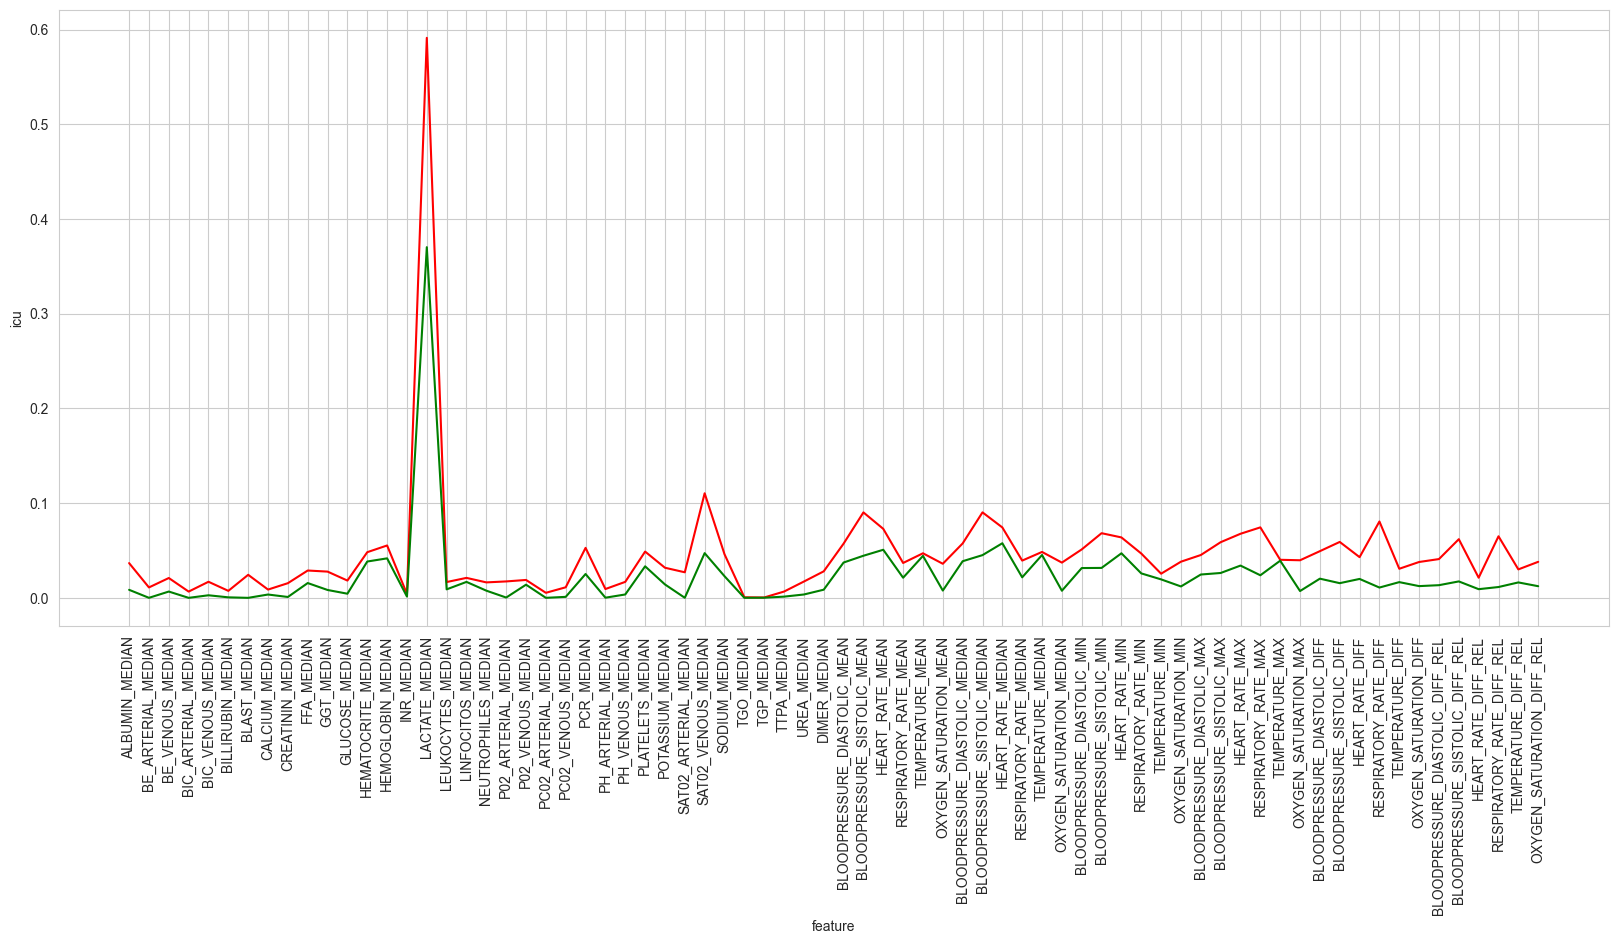

In [56]:
fig = plt.subplots(figsize=(20,8))
ax = sns.lineplot(data=var_vital_signs, x="feature", y="icu", color='r')
sns.lineplot(data=var_vital_signs, x="feature", y="non-icu", color='g')
plt.xticks(rotation=90)
plt.show()


Observation:
- The chart above confirms my assumptions because when standard deviation has been applied, it clearly shows the vital_signs values difference between patient who went to ICU (red line) and patient who did not go to ICU (green line). 

In [57]:
print(f"final dataset shape is:{dataset.shape}")

final dataset shape is:(351, 76)


# Feature choosing

### Strategy:
- drop features with low variance
- sort features by correlation to target
- choose optimal amount of features in order to optimise model

In [58]:
dataset.drop(columns = 'PATIENT_VISIT_IDENTIFIER', inplace=True)

In [59]:
dataset.describe()

AGE_PERCENTIL      GENDER  ALBUMIN_MEDIAN  BE_ARTERIAL_MEDIAN  \
count     351.000000  351.000000      351.000000          351.000000   
mean       52.905983    0.381766        0.554956           -0.985557   
std        28.816458    0.486513        0.149646            0.072823   
min        10.000000    0.000000       -0.263158           -1.000000   
25%        30.000000    0.000000        0.605263           -1.000000   
50%        50.000000    0.000000        0.605263           -1.000000   
75%        80.000000    1.000000        0.605263           -1.000000   
max       100.000000    1.000000        0.789474            0.000000   

       BE_VENOUS_MEDIAN  BIC_ARTERIAL_MEDIAN  BIC_VENOUS_MEDIAN  \
count        351.000000           351.000000         351.000000   
mean          -0.949424            -0.316517          -0.317374   
std            0.118326             0.055182           0.096368   
min           -1.000000            -0.756098          -1.000000   
25%           -1.000000            -0.317073          -0.317073   
50%           -1.000000            -0.317073          -0.317073   
75%           -0.950262            -0.317073          -0.317073   
max            0.000000             0.341463           0.341463   

       BILLIRUBIN_MEDIAN  BLAST_MEDIAN  CALCIUM_MEDIAN  CREATININ_MEDIAN  \
count         351.000000    351.000000      351.000000        351.000000   
mean           -0.944460     -0.993483        0.332771         -0.893073   
std             0.060816      0.106031        0.078625          0.089030   
min            -0.992674     -1.000000        0.030612         -0.970276   
25%            -0.962498     -1.000000        0.318027         -0.928521   
50%            -0.941218     -1.000000        0.357143         -0.909413   
75%            -0.938950     -1.000000        0.357143         -0.881104   
max             0.030525      0.969834        0.693878          0.232838   

       FFA_MEDIAN  GGT_MEDIAN  GLUCOSE_MEDIAN  HEMATOCRITE_MEDIAN  \
count  351.000000  351.000000      351.000000          351.000000   
mean    -0.726528   -0.930316       -0.856552           -0.133667   
std      0.147544    0.131480        0.104911            0.209338   
min     -0.927505   -0.997664       -0.929236           -0.903564   
25%     -0.757996   -0.958528       -0.891993           -0.250524   
50%     -0.742004   -0.958528       -0.891993           -0.132075   
75%     -0.742004   -0.954634       -0.855680           -0.002096   
max      0.680171    1.000000        0.452514            0.811321   

       HEMOGLOBIN_MEDIAN  INR_MEDIAN  LACTATE_MEDIAN  LEUKOCYTES_MEDIAN  \
count         351.000000  351.000000      351.000000         351.000000   
mean           -0.172548   -0.940769        0.449888          -0.760812   
std             0.222004    0.051919        0.734231           0.114210   
min            -0.871951   -0.991217       -0.975884          -0.966010   
25%            -0.299797   -0.959849        0.027331          -0.834299   
50%            -0.170732   -0.959849        1.000000          -0.788142   
75%            -0.036585   -0.933501        1.000000          -0.714465   
max             0.804878   -0.355082        1.000000          -0.020471   

       LINFOCITOS_MEDIAN  NEUTROPHILES_MEDIAN  P02_ARTERIAL_MEDIAN  \
count         351.000000           351.000000           351.000000   
mean           -0.736898            -0.825891            -0.177290   
std             0.139272             0.111417             0.090416   
min            -0.977178            -0.990796            -0.878049   
25%            -0.830221            -0.897359            -0.170732   
50%            -0.765560            -0.851140            -0.170732   
75%            -0.676349            -0.784914            -0.170732   
max             0.080913            -0.070028             0.731707   

       P02_VENOUS_MEDIAN  PC02_ARTERIAL_MEDIAN  PC02_VENOUS_MEDIAN  \
count         351.000000            351.000000          351.000000   


### Drop Low variance features

In [60]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.04) # Setting threshold of 4% low variance features
selector.fit(dataset.drop(['GO_ICU'], axis=1)) # Fit to train without target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

low_variance = dataset.drop(['GO_ICU'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(low_variance)))
print('These variables are {}'.format(list(low_variance)))

49 variables have too low variance.
These variables are ['ALBUMIN_MEDIAN', 'BE_ARTERIAL_MEDIAN', 'BE_VENOUS_MEDIAN', 'BIC_ARTERIAL_MEDIAN', 'BIC_VENOUS_MEDIAN', 'BILLIRUBIN_MEDIAN', 'BLAST_MEDIAN', 'CALCIUM_MEDIAN', 'CREATININ_MEDIAN', 'FFA_MEDIAN', 'GGT_MEDIAN', 'GLUCOSE_MEDIAN', 'INR_MEDIAN', 'LEUKOCYTES_MEDIAN', 'LINFOCITOS_MEDIAN', 'NEUTROPHILES_MEDIAN', 'P02_ARTERIAL_MEDIAN', 'P02_VENOUS_MEDIAN', 'PC02_ARTERIAL_MEDIAN', 'PC02_VENOUS_MEDIAN', 'PH_ARTERIAL_MEDIAN', 'PH_VENOUS_MEDIAN', 'POTASSIUM_MEDIAN', 'SAT02_ARTERIAL_MEDIAN', 'SODIUM_MEDIAN', 'TGO_MEDIAN', 'TGP_MEDIAN', 'TTPA_MEDIAN', 'UREA_MEDIAN', 'DIMER_MEDIAN', 'RESPIRATORY_RATE_MEAN', 'OXYGEN_SATURATION_MEAN', 'RESPIRATORY_RATE_MEDIAN', 'OXYGEN_SATURATION_MEDIAN', 'RESPIRATORY_RATE_MIN', 'TEMPERATURE_MIN', 'OXYGEN_SATURATION_MIN', 'BLOODPRESSURE_DIASTOLIC_MAX', 'OXYGEN_SATURATION_MAX', 'BLOODPRESSURE_DIASTOLIC_DIFF', 'BLOODPRESSURE_SISTOLIC_DIFF', 'HEART_RATE_DIFF', 'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF', 'BLOODPRESSUR

In [61]:
dataset.drop(columns = low_variance, inplace=True)

In [62]:
dataset.shape

(351, 26)

Observation:
- 49 features has been assigned as features with threshold = 4%, these features has been droped
- after droping low variance features, we have ended with 26 features (where one is target)

In [63]:
dataset.columns

Index(['AGE_PERCENTIL', 'GENDER', 'HEMATOCRITE_MEDIAN', 'HEMOGLOBIN_MEDIAN',
       'LACTATE_MEDIAN', 'PCR_MEDIAN', 'PLATELETS_MEDIAN',
       'SAT02_VENOUS_MEDIAN', 'BLOODPRESSURE_DIASTOLIC_MEAN',
       'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN', 'TEMPERATURE_MEAN',
       'BLOODPRESSURE_DIASTOLIC_MEDIAN', 'BLOODPRESSURE_SISTOLIC_MEDIAN',
       'HEART_RATE_MEDIAN', 'TEMPERATURE_MEDIAN',
       'BLOODPRESSURE_DIASTOLIC_MIN', 'BLOODPRESSURE_SISTOLIC_MIN',
       'HEART_RATE_MIN', 'BLOODPRESSURE_SISTOLIC_MAX', 'HEART_RATE_MAX',
       'RESPIRATORY_RATE_MAX', 'TEMPERATURE_MAX', 'RESPIRATORY_RATE_DIFF',
       'RESPIRATORY_RATE_DIFF_REL', 'GO_ICU'],
      dtype='object')

### Sort features by correlation to the target

In [64]:
# Features most important for prediction
corr_features = dataset.corr()['GO_ICU'].sort_values(ascending=False).head(20).index[1:]

In [65]:
corr_features

Index(['RESPIRATORY_RATE_MAX', 'RESPIRATORY_RATE_DIFF',
       'RESPIRATORY_RATE_DIFF_REL', 'AGE_PERCENTIL', 'PCR_MEDIAN',
       'BLOODPRESSURE_SISTOLIC_MAX', 'BLOODPRESSURE_SISTOLIC_MEAN',
       'TEMPERATURE_MAX', 'BLOODPRESSURE_SISTOLIC_MEDIAN',
       'TEMPERATURE_MEDIAN', 'TEMPERATURE_MEAN', 'HEART_RATE_MAX',
       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MEAN', 'HEART_RATE_MEDIAN',
       'HEART_RATE_MIN', 'PLATELETS_MEDIAN', 'SAT02_VENOUS_MEDIAN', 'GENDER'],
      dtype='object')

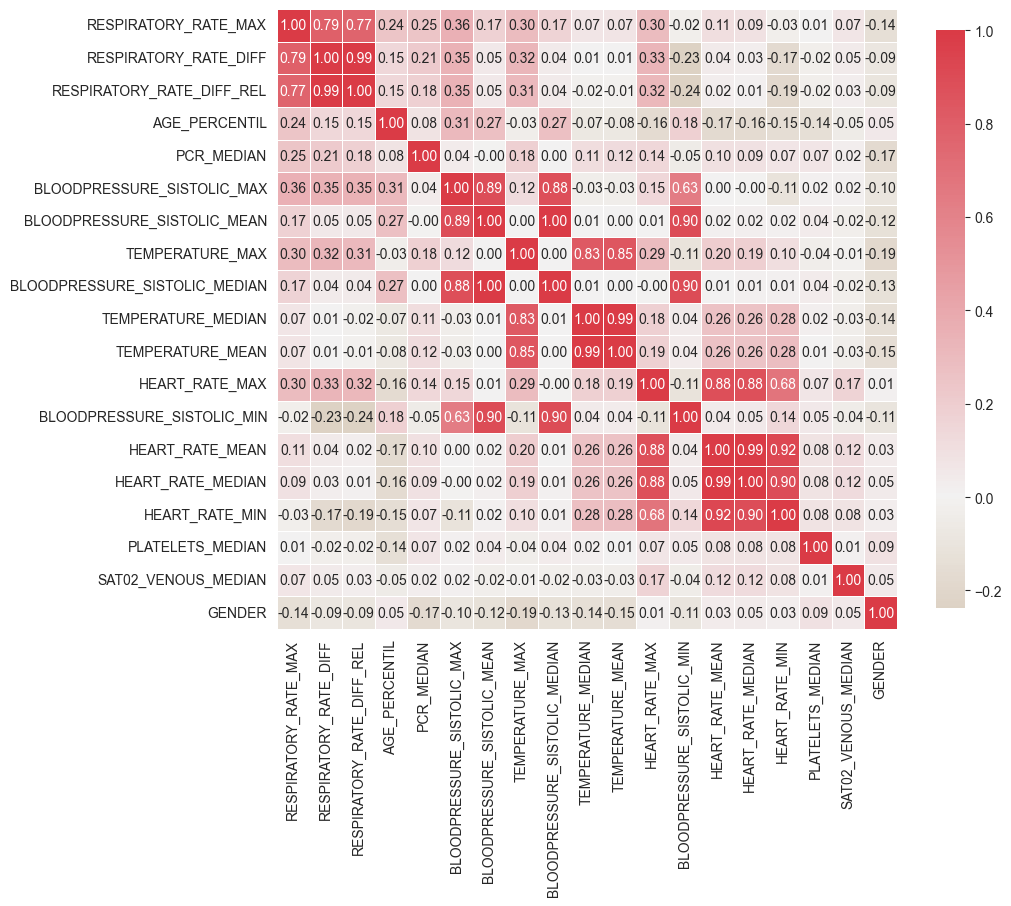

In [66]:
sample = dataset
var = corr_features
sample = sample[var]
corr_heatmap(sample)

Obsrevation:
- after many tests it turned out that 19 features gives the best results
- Heatmap displays correlation between features and the structure of the heatmap sorts features from the most corelated with the target, to the least correlated with the target (**y axis from top -** high correlation with the target, **to bottom** - the least correlation)


In [67]:
corr_features

Index(['RESPIRATORY_RATE_MAX', 'RESPIRATORY_RATE_DIFF',
       'RESPIRATORY_RATE_DIFF_REL', 'AGE_PERCENTIL', 'PCR_MEDIAN',
       'BLOODPRESSURE_SISTOLIC_MAX', 'BLOODPRESSURE_SISTOLIC_MEAN',
       'TEMPERATURE_MAX', 'BLOODPRESSURE_SISTOLIC_MEDIAN',
       'TEMPERATURE_MEDIAN', 'TEMPERATURE_MEAN', 'HEART_RATE_MAX',
       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MEAN', 'HEART_RATE_MEDIAN',
       'HEART_RATE_MIN', 'PLATELETS_MEDIAN', 'SAT02_VENOUS_MEDIAN', 'GENDER'],
      dtype='object')

### Keep only 19 features which have the highest correlation with the target

In [68]:
X = dataset[corr_features]
y = dataset["GO_ICU"]

### Drop correlated columns

**Strategy:**
After some testing, it turned out that respiratory rate and its variations, are quite important for model because of it's correlation with the target, so I have assumend that keeping correlated features with each other will still help the model with learning. I have decided to keep top 10 most correlated features with the target even if they are correlated with different features, if I will found feature which is correlated with different feature and it is outside top 10, then I will drop it.

In [69]:
# HEAD(20) - 85.5% - Random Forest
# col = ['RESPIRATORY_RATE_DIFF', 'RESPIRATORY_RATE_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_MEAN', 'BLOODPRESSURE_SISTOLIC_MEDIAN', "TEMPERATURE_MEAN", "HEART_RATE_MEAN", "HEART_RATE_MEDIAN", "HEART_RATE_MIN","BLOODPRESSURE_SISTOLIC_MIN"]
# X.drop(columns = col, inplace=True)


**Observation to the code commented out above:**
- This is similar approach but with all correlated columns dropped. I believe that it might better than the approach with top 10, since this one is defiently not overfitted

### Columns which are outside top 10

In [70]:
# HEAD(20) - 93.4% - Random Forest
col = ["TEMPERATURE_MEAN", "HEART_RATE_MEAN", "HEART_RATE_MEDIAN", "HEART_RATE_MIN","BLOODPRESSURE_SISTOLIC_MIN"]
X.drop(columns = col, inplace=True)


/var/folders/94/vt0_m_ds4ldfdtdt98l0j_cr0000gn/T/ipykernel_83979/2721181433.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Final view at features

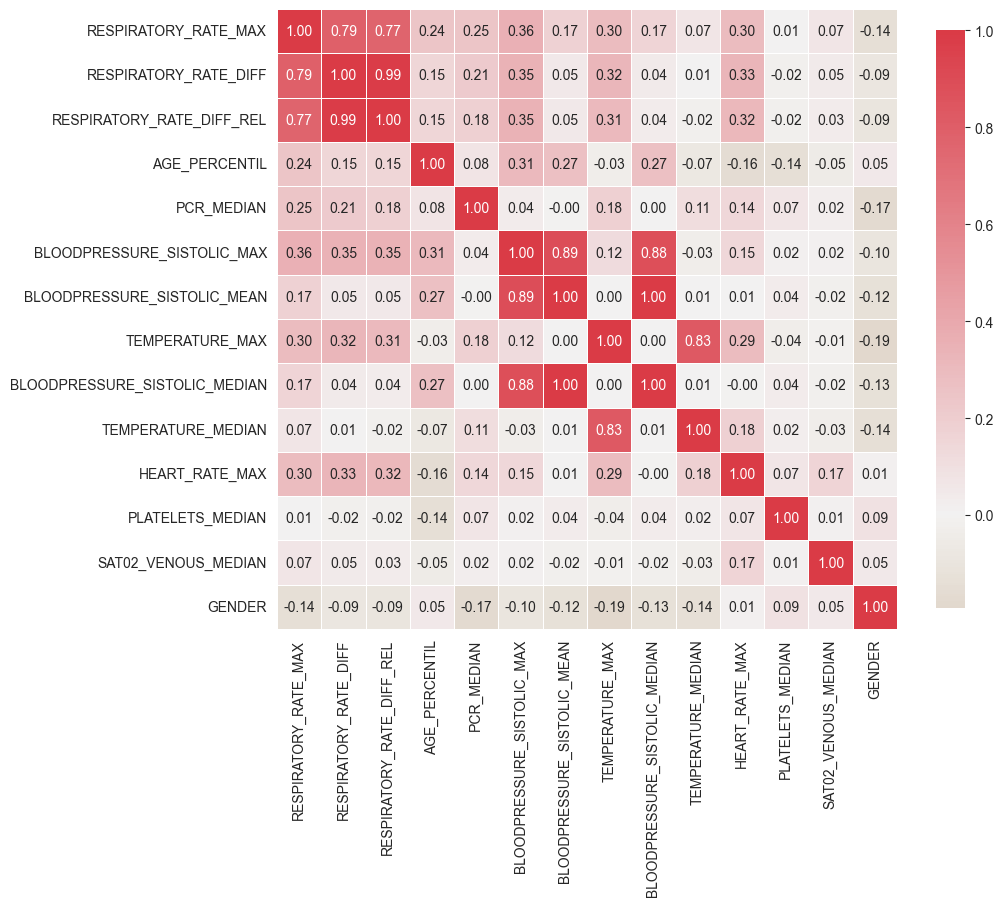

In [71]:
sample = X
corr_heatmap(sample)

## Final shape of the dataset for training

In [72]:
X.columns

Index(['RESPIRATORY_RATE_MAX', 'RESPIRATORY_RATE_DIFF',
       'RESPIRATORY_RATE_DIFF_REL', 'AGE_PERCENTIL', 'PCR_MEDIAN',
       'BLOODPRESSURE_SISTOLIC_MAX', 'BLOODPRESSURE_SISTOLIC_MEAN',
       'TEMPERATURE_MAX', 'BLOODPRESSURE_SISTOLIC_MEDIAN',
       'TEMPERATURE_MEDIAN', 'HEART_RATE_MAX', 'PLATELETS_MEDIAN',
       'SAT02_VENOUS_MEDIAN', 'GENDER'],
      dtype='object')

In [73]:
X.shape

(351, 14)

### evening out target imbalance (oversampling)

I have chosen oversampling since we do not have many samples

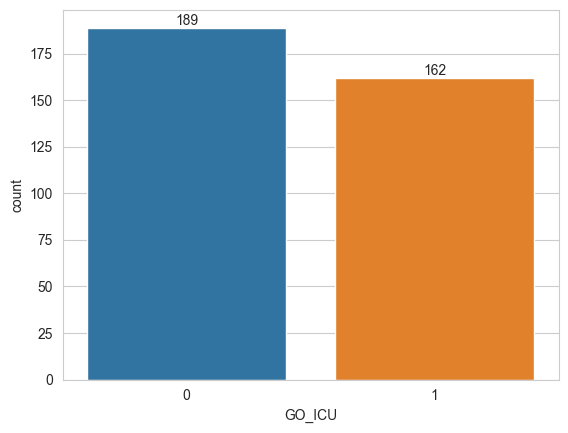

In [74]:
ax = sns.countplot(x="GO_ICU", data=dataset)
for i in ax.containers:
    ax.bar_label(i,)

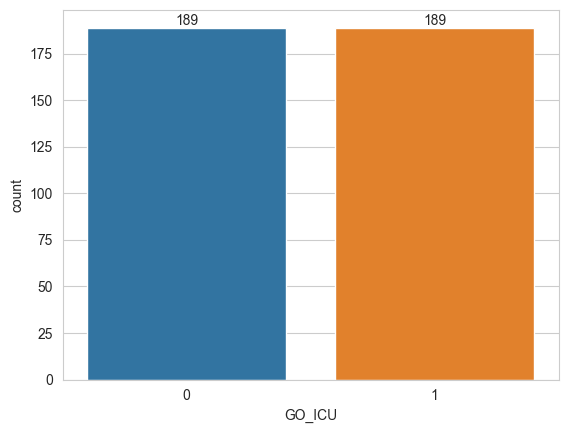

In [75]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y, data=dataset)
for i in ax.containers:
    ax.bar_label(i,)

# Model fitting

### Split the data between train and test data (20% test data)

In [97]:
norm = MinMaxScaler().fit(X)
X_norm = norm.transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_norm,y,test_size=0.2,random_state=42)

### Testing 7 models at the same time

In [98]:
clfs = {"LogisticRegression":LogisticRegression(), 
        "SVM":SVC(kernel='rbf', probability=True),
        "Decision":DecisionTreeClassifier(), 
        "RandomForest":RandomForestClassifier(), 
        "GradientBoost":GradientBoostingClassifier(),
        "XGBoost":XGBClassifier(verbosity=0), 
        "CatBoost":CatBoostClassifier(verbose=False)}

In [99]:
def model_fit(clfs):
    fitted_model={}
    model_result = pd.DataFrame()
    for model_name, model in clfs.items():
        model.fit(X_train,y_train)
        fitted_model.update({model_name:model})
        y_pred = model.predict(X_test)
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        model_dict['2.Accuracy'] = round(accuracy_score(y_test, y_pred),3)
        model_dict['3.Precision'] = round(precision_score(y_test, y_pred),3)
        model_dict['4.Recall'] = round(recall_score(y_test, y_pred),3)
        model_dict['5.F1'] = round(f1_score(y_test, y_pred),3)
        model_dict['6.ROC'] = round(roc_auc_score(y_test, y_pred),3)
        model_result = model_result.append(model_dict,ignore_index=True)
    return fitted_model, model_result

In [100]:
fitted_model, model_result = model_fit(clfs)

/var/folders/94/vt0_m_ds4ldfdtdt98l0j_cr0000gn/T/ipykernel_83979/111864206.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/94/vt0_m_ds4ldfdtdt98l0j_cr0000gn/T/ipykernel_83979/111864206.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/94/vt0_m_ds4ldfdtdt98l0j_cr0000gn/T/ipykernel_83979/111864206.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/94/vt0_m_ds4ldfdtdt98l0j_cr0000gn/T/ipykernel_83979/111864206.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/94/vt0_m_ds4ldfdtdt98l0j_cr0000gn/T/ipykernel_83979/111864206.py:15: FutureWarning:

The frame.append method is depreca

In [101]:
model_result.sort_values(by=['2.Accuracy'],ascending=False)

1.Algorithm  2.Accuracy  3.Precision  4.Recall   5.F1  6.ROC
3        RandomForest       0.934        0.921     0.946  0.933  0.935
6            CatBoost       0.921        0.919     0.919  0.919  0.921
4       GradientBoost       0.908        0.895     0.919  0.907  0.908
5             XGBoost       0.908        0.917     0.892  0.904  0.907
2            Decision       0.882        0.868     0.892  0.880  0.882
0  LogisticRegression       0.816        0.829     0.784  0.806  0.815
1                 SVM       0.803        0.867     0.703  0.776  0.800

**Observation:**
- Random forest turned out to have the highest accuracy = 93.4% from the rest 6 different alghorithms
- The next 4 (CatBoost, GradientBoost, XGBoost, Decision) have quite similar results

In [102]:
model_result["1.Algorithm"][2:]

2         Decision
3     RandomForest
4    GradientBoost
5          XGBoost
6         CatBoost
Name: 1.Algorithm, dtype: object

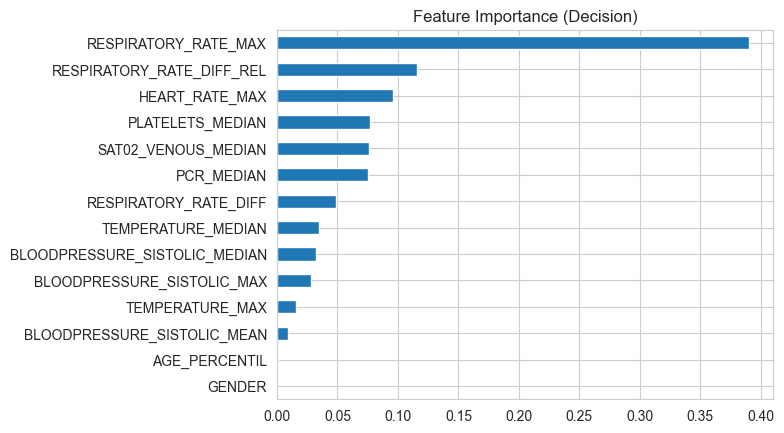

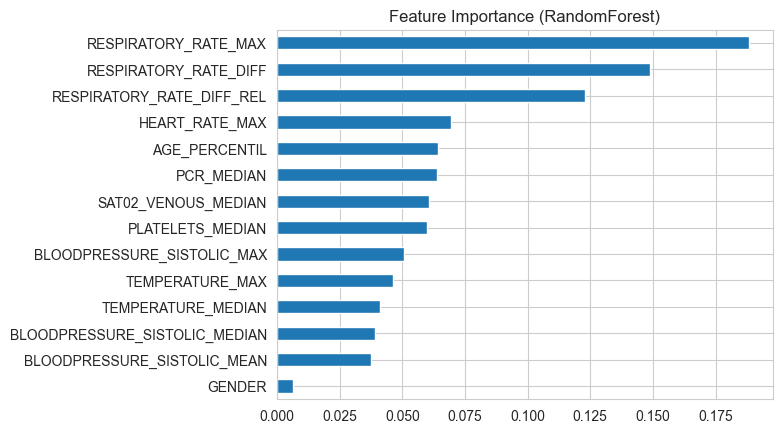

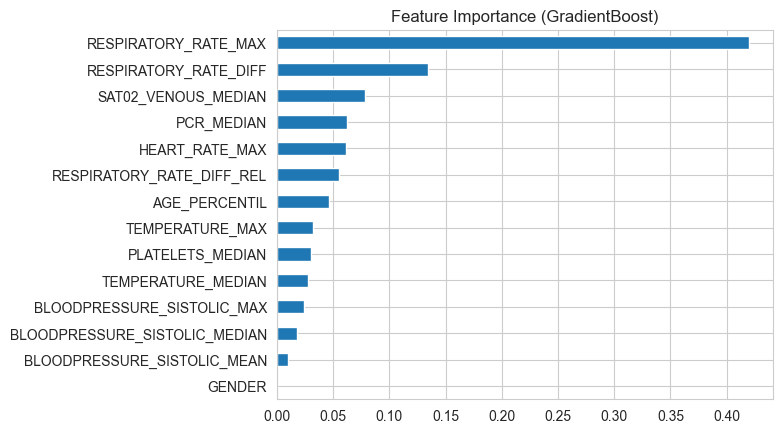

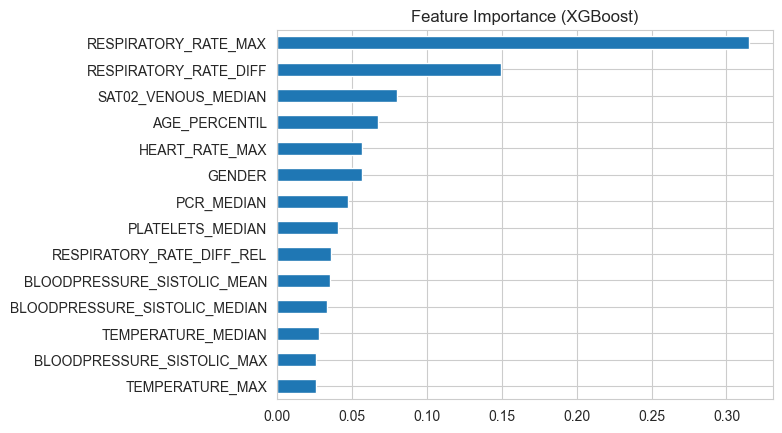

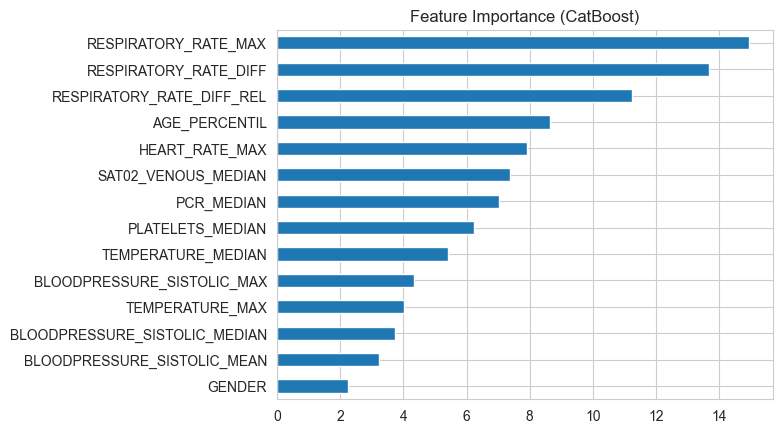

In [103]:
model_name = model_result["1.Algorithm"][2:]
for model in model_name:
    feat_imp = pd.Series(fitted_model.get(model).feature_importances_, index=X.columns)
    feat_imp = feat_imp.nlargest(15).sort_values()
    feat_imp.plot(kind="barh", title="Feature Importance ({:})".format(model))
    plt.show()

**Observations:**
- CatBoost has distributed feature importance accros many features and the most important ones are those related to **respiratory rate**
- Random forest also has distributed feature importance accros many features, but we can see higher importance related to **respiratory rate** than the rest. 
- the rest of the algorithms have distributed feature importance almost entirely into one **respiratory rate** related feature.

# Summary of the most efficient model

## Random Forest
- Accuracy = 93.4%
- Precision = 92.1%
- Recall = 94.6%
- F1 = 93.3%
- ROC = 93.5%